In [1]:
import numpy as np

filename = "iris.csv"

numSamples = 150
numFeatures = 4

## Point1: Load the Dataset

In [3]:
def loadIrisDataset(path):
    rawData = np.genfromtxt(path, delimiter=',', dtype = "str")
    
    #extract the 4 features and insert them into D
    D = rawData[:, 0:4] #D shape: (150, 4)
    D = np.array(D, np.float32).T  #Dont't do reshape! Because I want onr row= 150 samples of the same feature! .reshape((numFeatures, numSamples))

    #L_string = rawData[:, 4].reshape((numSamples, 1))  
    classLabels = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    
    L = np.array([classLabels[name] for name in rawData[:, 4]], dtype=int) #.reshape((numSamples, 1)) #I want a column vector of shape (150, 1)
    

    return D, L

In [4]:
D, L = loadIrisDataset(filename)

In [5]:
L[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
D[0, :]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

In [7]:
print("D shape:", D.shape)
print("L shape:", L.shape)

D shape: (4, 150)
L shape: (150,)


D has 4 rows (one row = one different feature), and 150 columns (1 column = 1 sample)
L is a row vector having all the class labels
D[i, j] -> i identifies the the FEATURE (0 to 3), j identifies the SAMPLE (0 to 149)

In [8]:
print("first sample, first feature:", D[0, 0])
print("first sample, second feature:", D[1, 0])
print("first element, third feature:", D[2, 0])
print("first element, fourth feature:", D[3, 0])
print("first element, class Label:", L[0])

first sample, first feature: 5.1
first sample, second feature: 3.5
first element, third feature: 1.4
first element, fourth feature: 0.2
first element, class Label: 0


In [9]:
finalList = []
for row in D:
    finalList.append(row)
finalList.append(L)

finalList

[array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3

## Point 2: Visualizing DataSet

In [10]:
import matplotlib.pyplot as plt

In [11]:
x = finalList[:4]
y = finalList[-1]
#x[0][0]
x[0][:] #first feature, 150 samples

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)

### Class labels are ORDERED: FIRST LABEL 0 (SETOSA), THEN 1 (VERSICOLOR), THEN 2 (VIRGINICA)

In [12]:

def densityFeaturePlots(x, y, bins=None):
    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}
    for i in range(numFeatures):
        plt.figure(figsize=(6,4))
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            #print(sample_with_that_class)
            plt.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black", bins=None)
            plt.legend()  # Mostra la legenda

        plt.title(f"Feature {featuresNames[i]} Distribution")
        plt.xlabel(featuresNames[i])
        plt.ylabel("Density")
        plt.show()

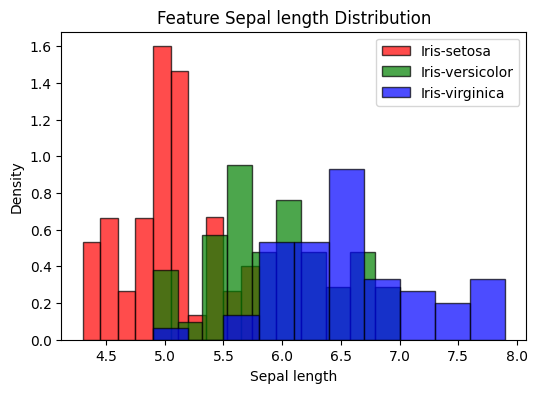

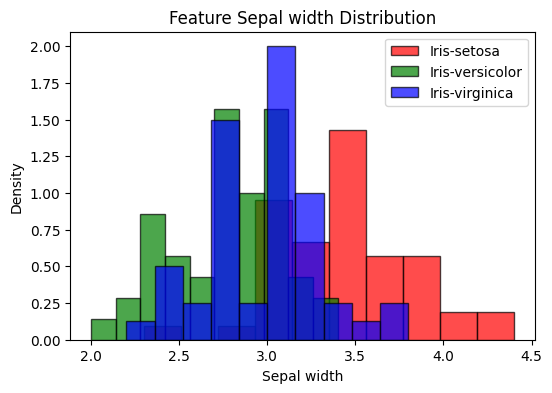

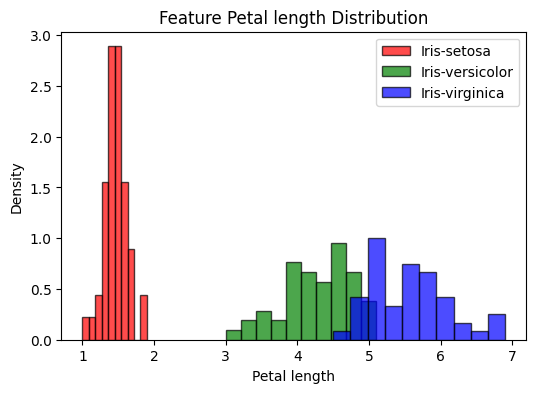

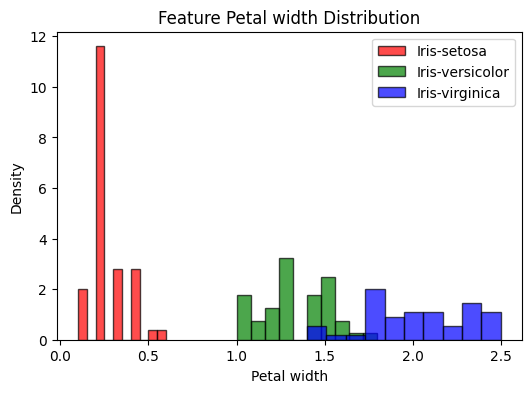

In [13]:
#Plot the four density histograms
densityFeaturePlots(x, y)

We can observe that there is large overlap for the first two features, whereas values for the third and
fourth features of iris-setosa are well separated from those of the other two flower families.

We now consider pairs of values and visualize the scatter plots of the different feature pairs for each class.

In [15]:

def scatterPlots(x, y):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 4
    rows = 4

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel(featuresNames[j])
            subplot.legend()
            subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

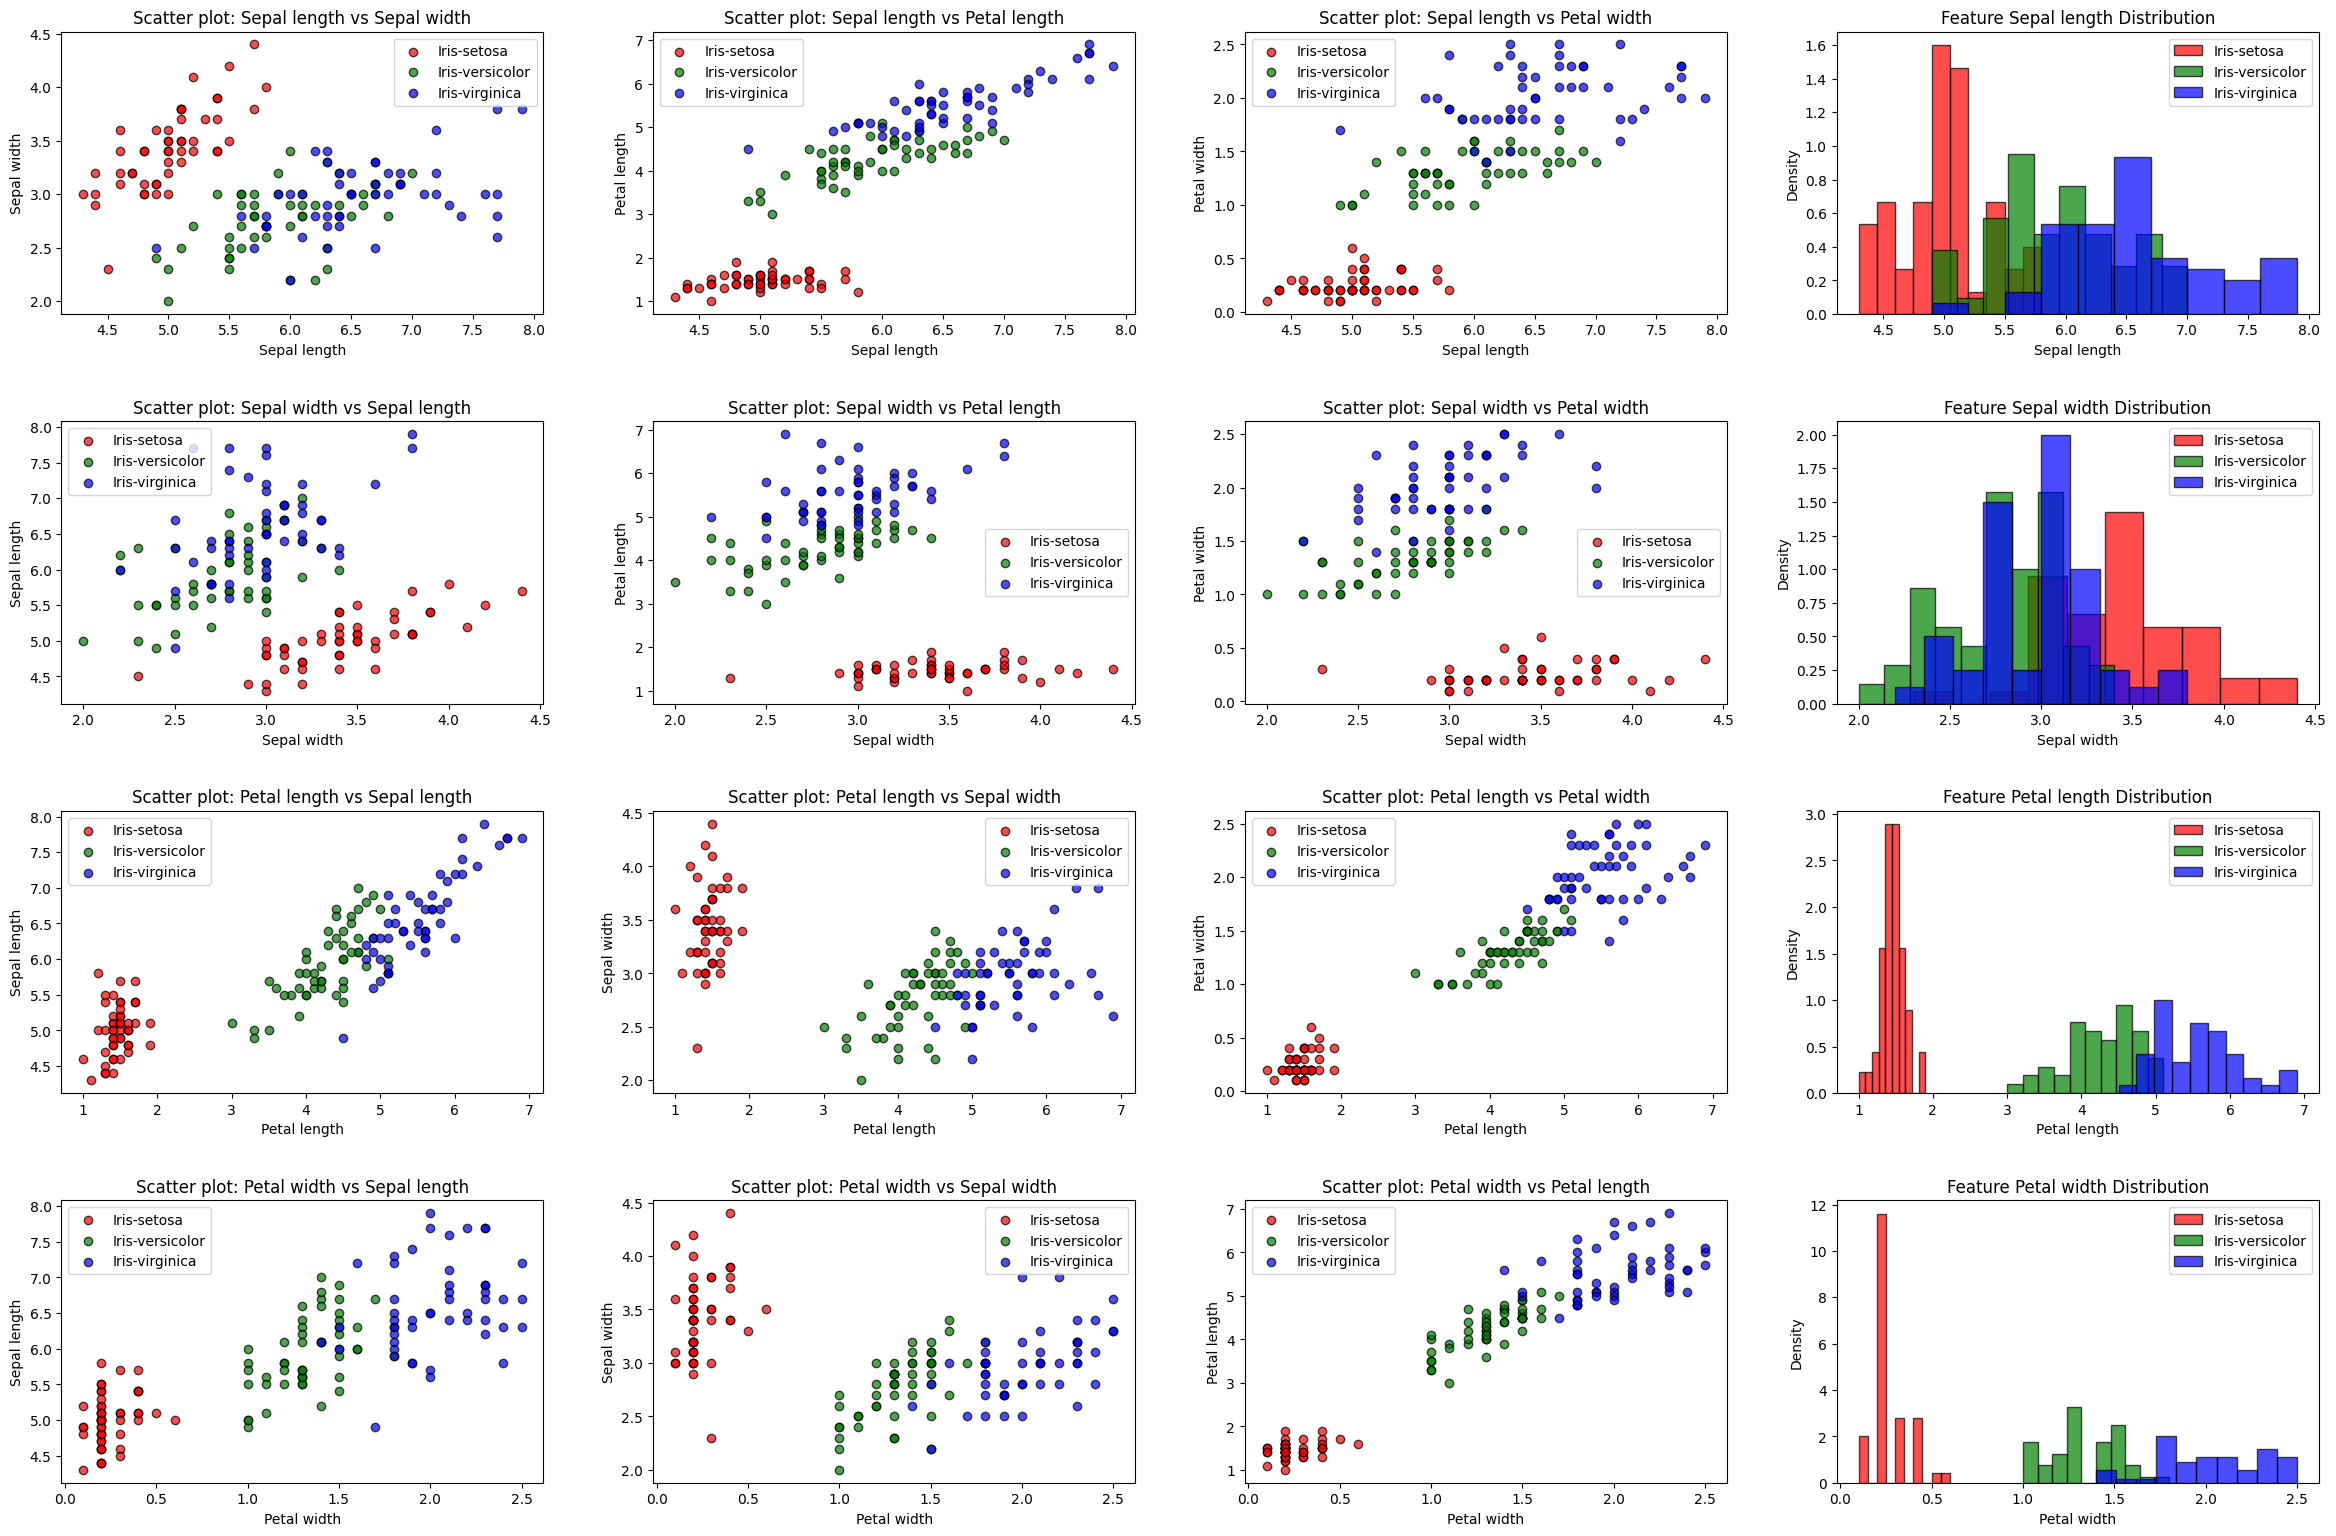

In [16]:
scatterPlots(x, y)


## Point 3: Statistics Computation

### Dataset Mean

In [17]:
D.shape

(4, 150)

The for loop is, in general, slow. Numpy allows
computing the mean of an array through the method .mean. The method allows specifying an axis —
for 2-D arrays, axis = 0 allows computing the mean over rows, whereas axis = 1 allows computing
the means over columns

In [18]:
mu = D.mean(axis=1) #over columns
mu

array([5.8433347, 3.0573332, 3.7580001, 1.1993335], dtype=float32)

In [19]:
mu.shape

(4,)

Pay attention to the shape of D.mean(1): it’s a 1-D array, thus we convert it to a column vector through
the .reshape method

In [20]:
mu = mu.reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [21]:
mu.shape

(4, 1)

We now exploit broadcasting to **center the data**, i.e. to **remove the mean from all points**. Notice that we want the mean to be a column vector, so we first reshape it.

In [22]:
DC = D - mu #D centered, so with every element - mu
print(f"Before centering: {D[0][0:10]}\nAfter centering: {DC[0][0:10]}")

Before centering: [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]
After centering: [-0.7433348  -0.9433346  -1.1433349  -1.2433348  -0.8433347  -0.44333458
 -1.2433348  -0.8433347  -1.4433346  -0.9433346 ]


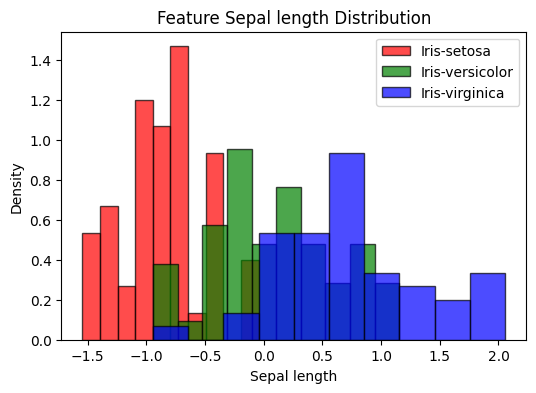

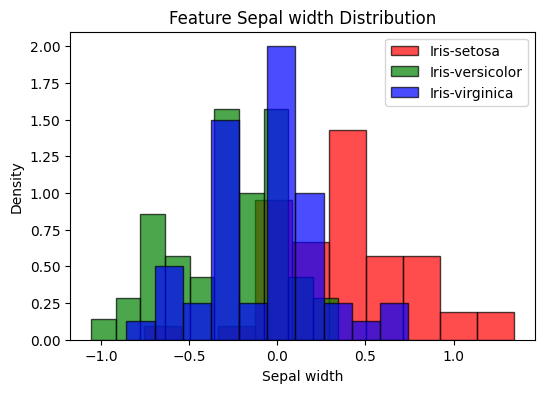

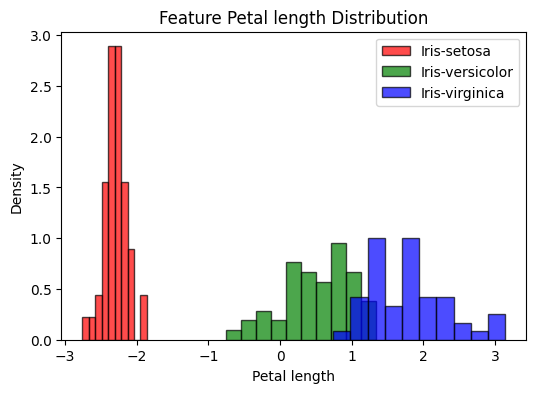

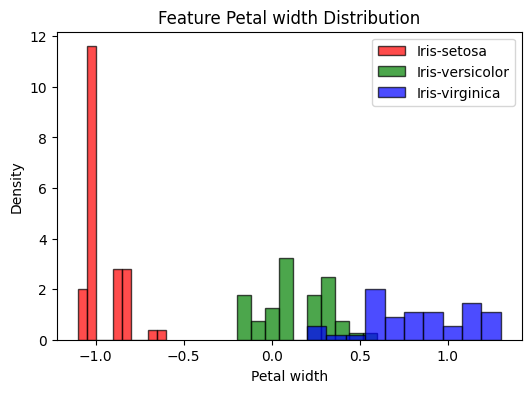

In [23]:
#Now I plot again the data that is now centered (the D vector changes)
x = DC

densityFeaturePlots(x, y)

Since the x are now centered, the x axis range is significantly smaller in the four plots

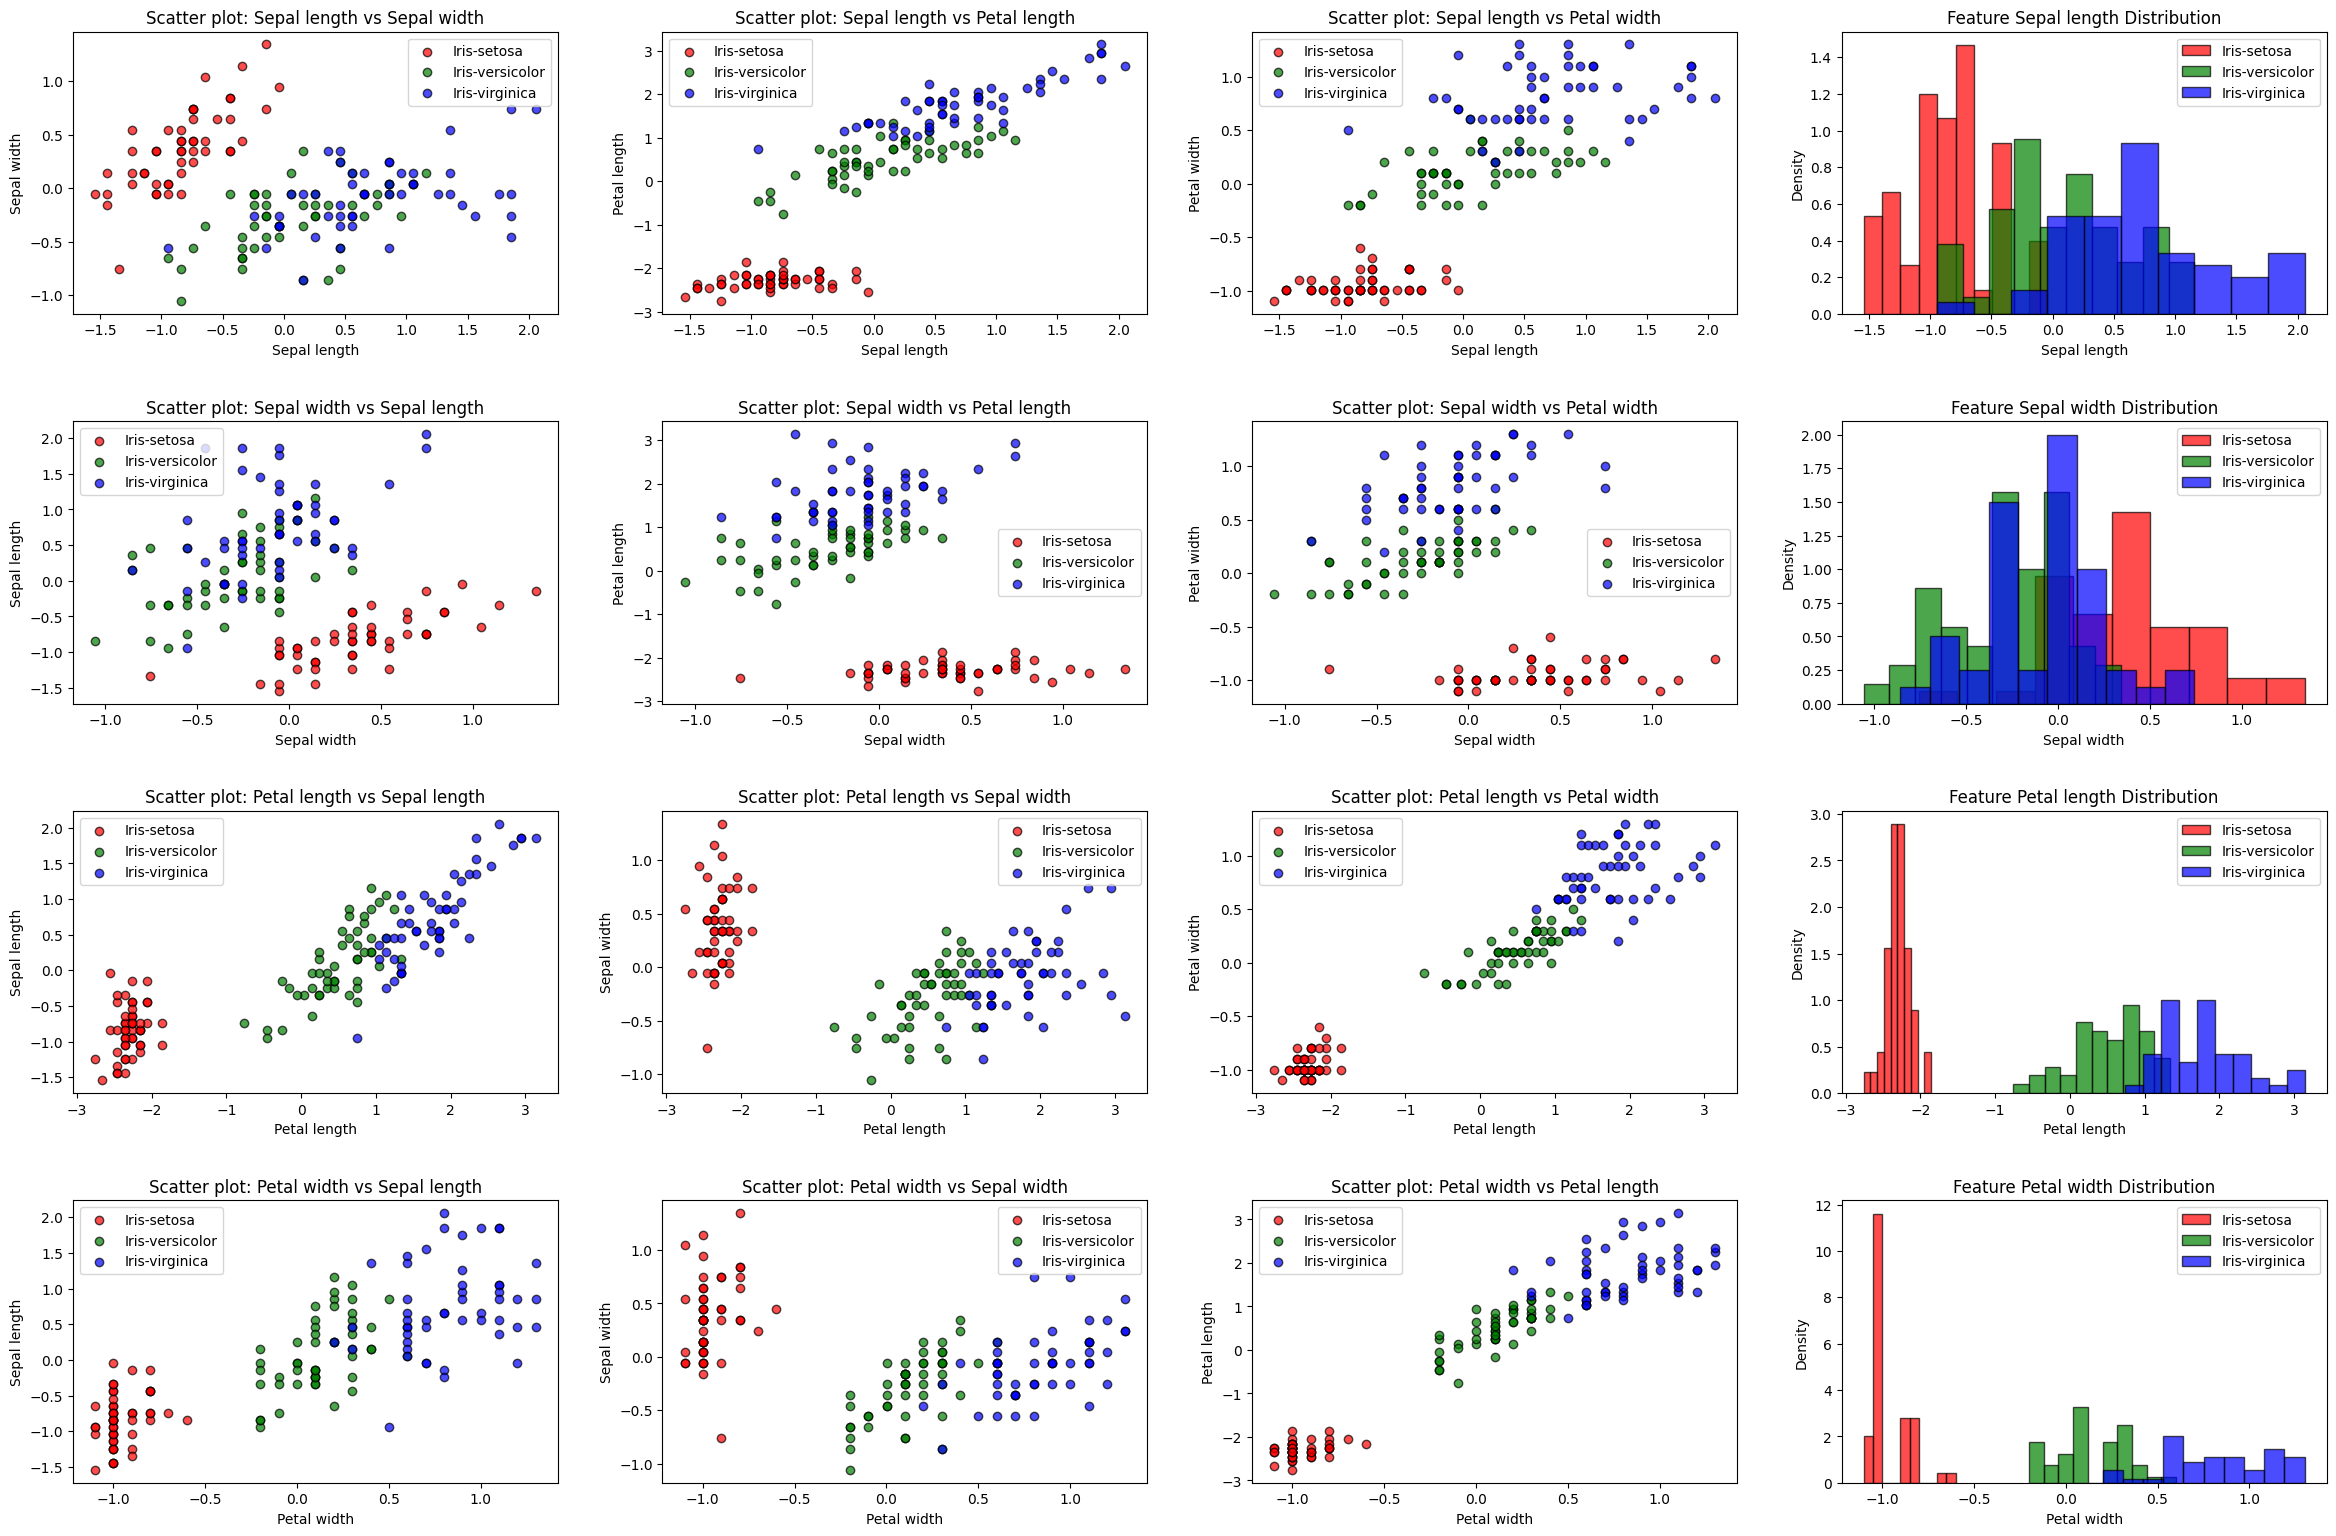

In [24]:
#Now I plot again the 16 scatterplots
x = DC
scatterPlots(x, y)

Now both the y and the x axis in the scatter plots have way smaller ranges since all the features values are centered.

### Covariance Matrix

The standard way of computing the covariance would be: <br> 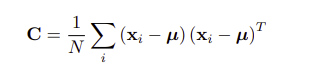

We can compute the covariance matrix using a for loop: <br>
```python
C = 0
for i in range(D.shape[1]):
C += (D[:, i:i+1] - mu) @ (D[:, i:i+1] - mu).T
C = C / float(D.shape[1])
``` 
<br>
Also in this case, the loop is slow. We can observe that we can arrange computations to express the
covariance matrix as: <br>

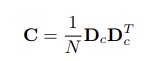

where Dc is the centered D numpy vector. <br>
In python:
```python
C = (DC @ DC.T) / float(D.shape[1])
```
where ```DC = D - mu```

In [25]:
#Compute the Covariance Matrix C using DC = D - mu
C = (DC @ DC.T) / float(D.shape[1])     #the function np.cov(...) does this

In [26]:
C.shape

(4, 4)

The shape of the Covariance Matrix is (4,4) (it's always a square matrix) since we have four features and we compute the covariance for each **pair** of features!

In [27]:
C

array([[ 0.681122  , -0.0421511 ,  1.2658201 ,  0.5128289 ],
       [-0.0421511 ,  0.18871292, -0.32745862, -0.12082848],
       [ 1.2658201 , -0.32745862,  3.095504  ,  1.2869718 ],
       [ 0.5128289 , -0.12082848,  1.2869718 ,  0.577133  ]],
      dtype=float32)

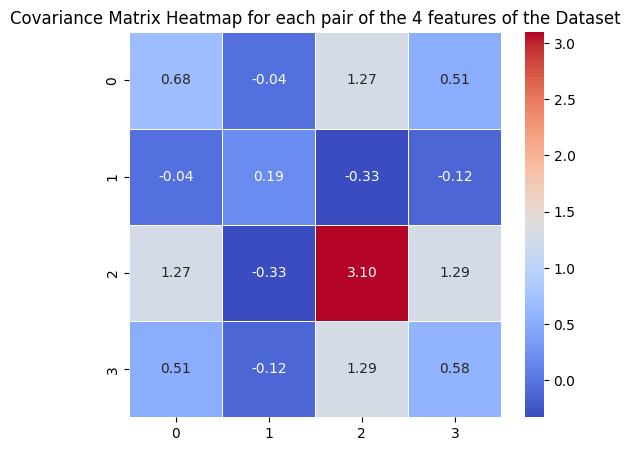

In [28]:
#Better representation with seaborn
#Seaborn function heatmap is more optimized than motplotlib function imshow so I use seaborn
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Covariance Matrix Heatmap for each pair of the 4 features of the Dataset")
plt.show()

# LAB3

## Dimensionality Reduction


### PCA - Principal Components Analysis

In [26]:
# mu is the mean computed on the columns of the D matrix of features: mu = D.mean(axis=1).reshape((mu.shape[0], 1))
mu

array([[5.8433347],
       [3.0573332],
       [3.7580001],
       [1.1993335]], dtype=float32)

In [27]:
# C is the Covariance Matrix for the iris dataset, already computed before on the centered features DC = D - mu:


#Compute the Covariance Matrix C using DC = D - mu
#C = (DC @ DC.T) / float(D.shape[1])     #the function np.cov(...) does this

C

array([[ 0.6811218 , -0.0421511 ,  1.2658201 ,  0.512829  ],
       [-0.0421511 ,  0.1887129 , -0.32745862, -0.12082852],
       [ 1.2658201 , -0.32745862,  3.0955045 ,  1.2869717 ],
       [ 0.512829  , -0.12082852,  1.2869717 ,  0.577133  ]],
      dtype=float32)

In [28]:
print(f"Is C a square matrix? {C.shape}")

Is C a square matrix? (4, 4)


In [29]:
print(f"Is C a symmetrix matrix?\n {C == C.T}")

Is C a symmetrix matrix?
 [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


<ul>
<li> C is a square matrix
<li> C is symmetric (C = C.T) <br>
</ul>

-> **I can use eigen-decomposition**

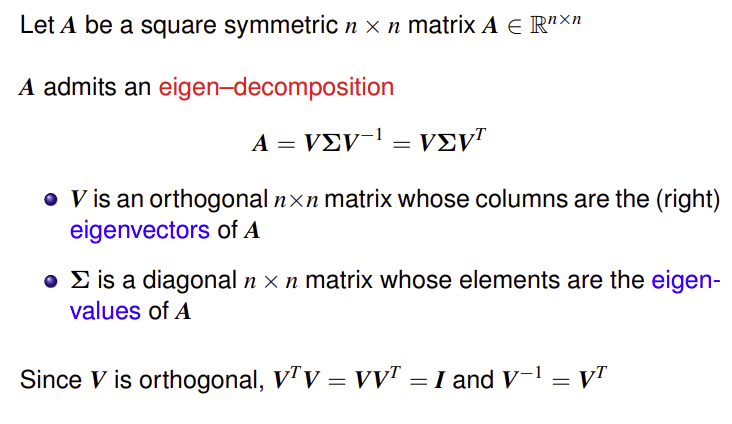

In [30]:
#Use numpy.linalg.eig vs numpy.linalg.eigh

#s = sigma, diagonal matrix containing the eigen valuez
#U = V, orthogonal matrix whose columns are the eigen vectors 

#1. Using numpy.linalg.eig the result are not sorted
s, U = np.linalg.eig(C)
print(f"Using eig:\n s: {s}\n U: {U}")

#2. Using numpy.linalg.eigh the result are sorted from Smallest to Largest eigenvalues
s, U = np.linalg.eigh(C)
print(f"\nUsing eigh:\n s: {s}\n U: {U}")

#We will mainly use eigh in this case
print(f"\nShape of s: {s.shape}\nShape of U: {U.shape}")

Using eig:
 s: [4.2000546  0.24105279 0.07768784 0.02367693]
 U: [[ 0.36138648 -0.65658814 -0.58203006  0.3154882 ]
 [-0.08452249 -0.7301621   0.5979094  -0.3197243 ]
 [ 0.85667074  0.1733726   0.07623544 -0.4798389 ]
 [ 0.35828903  0.07548022  0.5458329   0.75365657]]

Using eigh:
 s: [0.02367693 0.07768784 0.24105279 4.2000546 ]
 U: [[ 0.3154882   0.58203006  0.65658814 -0.36138648]
 [-0.3197243  -0.5979094   0.7301621   0.08452249]
 [-0.4798389  -0.07623544 -0.1733726  -0.85667074]
 [ 0.75365657 -0.5458329  -0.07548022 -0.35828903]]

Shape of s: (4,)
Shape of U: (4, 4)


U is 4x4, in fact the dataset has 4 featues! So the original space has **4 dimensions**. The columns of U are the eigen-vectors corresponding to related eigen-values of s, which are also four (obviously). <br>
Later on I will write a function to apply PCA given any (reasonable, so from 1 to 4 in this case) value of m. For now I will maintain m = 4 so I won't reduce the subspace dimensionality, just extract relevant info.

In [31]:
# Set m in this case
m = 4

#The m leading eigenvectors can be
#retrieved from U (here we also reverse the order of the columns of U so that the leading eigenvectors are
#in the first m columns):

P = U[:, ::-1][:, 0:m]  #first reverse order of U to show leading eigen-vector first (so from highest to lowest), then take just the FIRST m COLUMNS of U!

print(f"P is the subspace derived from PCA setting m={m}:\n{P}")
print(f"Shape of P: {P.shape}")

P is the subspace derived from PCA setting m=4:
[[-0.36138648  0.65658814  0.58203006  0.3154882 ]
 [ 0.08452249  0.7301621  -0.5979094  -0.3197243 ]
 [-0.85667074 -0.1733726  -0.07623544 -0.4798389 ]
 [-0.35828903 -0.07548022 -0.5458329   0.75365657]]
Shape of P: (4, 4)


Since the covariance matrix is semi-definite positive, we can also get the sorted eigenvectors from the
**Singular Value Decomposition** (*SVD*). <br> This is the most general method used also for rectangular matrices, and generalizes eigen-decomposition:
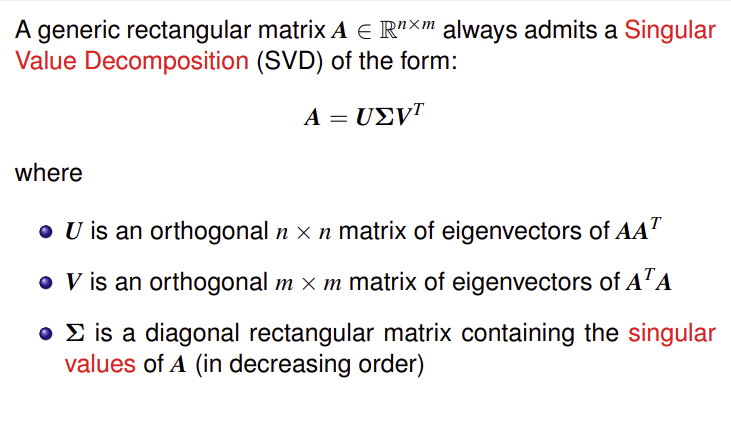

In [32]:
#U: left eigen vectors of A.T*A, so left singular vectors of A
#s = sigma -> singular values of A
#Vh = transpose of V -> right eigen vectors of A.T*A, so right singular vectors of A

U, s, Vh = np.linalg.svd(C)

#In this case, the singular values (which are equal to the eigenvalues) are sorted in descending order, and
#the columns of U are the corresponding eigenvectors

print(f"U:\n{U}\nShape of U: {U.shape}\n")
print(f"s: {s}\nShape of s: {s.shape}\n")
print(f"Vh:\n{Vh}\nShape of Vh: {Vh.shape}")

U:
[[-0.36138648 -0.65658814  0.58203006  0.3154882 ]
 [ 0.08452249 -0.7301621  -0.5979094  -0.3197243 ]
 [-0.85667074  0.1733726  -0.07623544 -0.4798389 ]
 [-0.35828903  0.07548022 -0.5458329   0.75365657]]
Shape of U: (4, 4)

s: [4.2000546  0.24105279 0.07768784 0.02367693]
Shape of s: (4,)

Vh:
[[-0.36138648  0.08452249 -0.85667074 -0.35828903]
 [-0.65658814 -0.7301621   0.1733726   0.07548022]
 [ 0.58203006 -0.5979094  -0.07623544 -0.5458329 ]
 [ 0.3154882  -0.3197243  -0.4798389   0.75365657]]
Shape of Vh: (4, 4)


### SVD vs Eigen Decomposition, computational costs

Svd is a generalization of Eigen Decomposition, so it works with every square symmetrix matrix as Eigen Decomposition, but also works with a borader range of cases (ex rectangular martrices). <br>

#### Computational Cost for Eigen decomposition:

1. We first have to compute the covariance matrix, which is $O(p^2 \cdot n)$.
2. Then Eigen Decomposition has a cost of $O(p^3)$.
3. So the total cost is $O(p^2 \cdot n + p^3)$.

#### Computational Cost for SVD:

SVD has a cost which is $O(min \{p^2 \cdot n, n^2 \cdot p\})$
-> This is usually more efficient!!

-> **You can always prefer SVD over Eigen Decomposition**
 

In [33]:
m=4

P = U[:, 0:m]

P

array([[-0.36138648, -0.65658814,  0.58203006,  0.3154882 ],
       [ 0.08452249, -0.7301621 , -0.5979094 , -0.3197243 ],
       [-0.85667074,  0.1733726 , -0.07623544, -0.4798389 ],
       [-0.35828903,  0.07548022, -0.5458329 ,  0.75365657]],
      dtype=float32)

Now, the last thing to do is to project the data in the subspace spanned by the m columns
of U corresponding to the m highest eigenvalues (matrix P) using projection rules:

<ul>
<li>y = P.T * x -- if we have a point x
<li>DP = P.T @ D -- if we have a matrix of samples D
</lu>

In [34]:
#Find the samples projected onto P:

DP = P.T @ D #it's the same as: DP = np.dot(P.T, D)

print(f"Shape of DP: {DP.shape}")
print(f"All the four features for each of the first 10 samples of the projected samples DP:\n{DP[:, :10]}")

Shape of DP: (4, 150)
All the four features for each of the first 10 samples of the projected samples DP:
[[-2.8182392  -2.7882233  -2.6133742  -2.757022   -2.7736483  -3.2215052
  -2.681827   -2.87622    -2.6159823  -2.829609  ]
 [-5.646349   -5.1499505  -5.1820025  -5.0086527  -5.6537066  -6.068283
  -5.237491   -5.490337   -4.74864    -5.2131777 ]
 [ 0.65977424  0.842323    0.6139584   0.6002993   0.54178035  0.46318242
   0.37396663  0.65373856  0.61109895  0.82949173]
 [-0.03108844  0.06567613 -0.01338259 -0.10892666 -0.09460958 -0.057552
  -0.08149443 -0.07864869 -0.06009554 -0.08964584]]


In [35]:
np.save(f"IRIS_PCA_matrix_m{m}.npy", P)

# np.load("IRIS_PCA_matrix_m4.npy") to load back the P matrix from the file

### Function for PCA

In [36]:
def computeC(D):
    '''
    Params:
    - D: Dataset features matrix, not centered

    Returned Values:
    - C: Covariance matrix of centered D
    '''
    
    mu = D.mean(axis = 1)                       #compute mu as a row array
    mu = mu.reshape((mu.shape[0], 1))           #reshape mu as a column array
    DC = D - mu                                 #center D
    C = (DC @ DC.T) / float(DC.shape[1])        #compute C, the Covariance Matrix, from DC

    return C

In [37]:
def calculatePCA(D, m):
    '''
    Params:
    - m: dimensionality of target subspace (m has to be <= dimensionality of original space of D)
    - D: Dataset features matrix, not centered

    Returned Values:
    - P: the subspace whose dimensionality is m
    '''

    #1. Compute C, the Covariance Matrix
    C = computeC(D)

    #2. Use SVD since it's usually more efficient than Eigen Decomposition and cover a broaders range of cases
    #   U: left eigen vectors of A.T*A, so left singular vectors of A
    #   s = sigma -> singular values of A
    #   Vh = transpose of V -> right eigen vectors of A.T*A, so right singular vectors of A
    U, s, Vh = np.linalg.svd(C)

    #3. The Eigen Values are already sorted from the largest to the smallest
    #   Take just the leading m Eigen Vectors describing the subspace P
    P = U[:, 0:m]

    #4. Return the subspace P
    return P



In [38]:
def applyPCA(D, P):
    '''
    Params:
    - D: Dataset features matrix, not centered
    - P: Subspace onto which you want to project the samples D
    '''

    #using np.dot or @ is the same
    return P.T @ D  #return np.dot(P.T, D)

### Testing PCA with m = 2, so reducing 2 dimensions from the original space

In [39]:

# Subspace P of m = 2 dimensions
m = 2
P_2 = calculatePCA(D, m)

print(f"Subspace caculated:\n {P_2}")

# Apply PCA and return the samples projected onto P

DP_2 = applyPCA(D, P_2)

print(f"Shape of DP_{m}: {DP_2.shape}") #shape is now (2, 150), not (4, 150) anymore! Dimensionality Reduction!
print(f"All the features for each of the first 10 samples of the projected samples DP_{m}:\n{DP_2[:, :10]}")

Subspace caculated:
 [[-0.36138648 -0.65658814]
 [ 0.08452249 -0.7301621 ]
 [-0.85667074  0.1733726 ]
 [-0.35828903  0.07548022]]
Shape of DP_2: (2, 150)
All the features for each of the first 10 samples of the projected samples DP_2:
[[-2.8182392 -2.7882233 -2.6133742 -2.757022  -2.7736483 -3.2215052
  -2.681827  -2.87622   -2.6159823 -2.829609 ]
 [-5.646349  -5.1499505 -5.1820025 -5.0086527 -5.6537066 -6.068283
  -5.237491  -5.490337  -4.74864   -5.2131777]]


Now 2 features (the last 2) are gone, and I have just the first 2 features -> they are related to the leading eigen vectors!

In [40]:
def scatterPlots2(x, y, numFeatures, bins=None):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 2
    rows = 2

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel(featuresNames[j])
            subplot.legend()
            subplot.set_title(f"Scatter plot: {featuresNames[i]} vs {featuresNames[j]}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black", bins=bins)
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

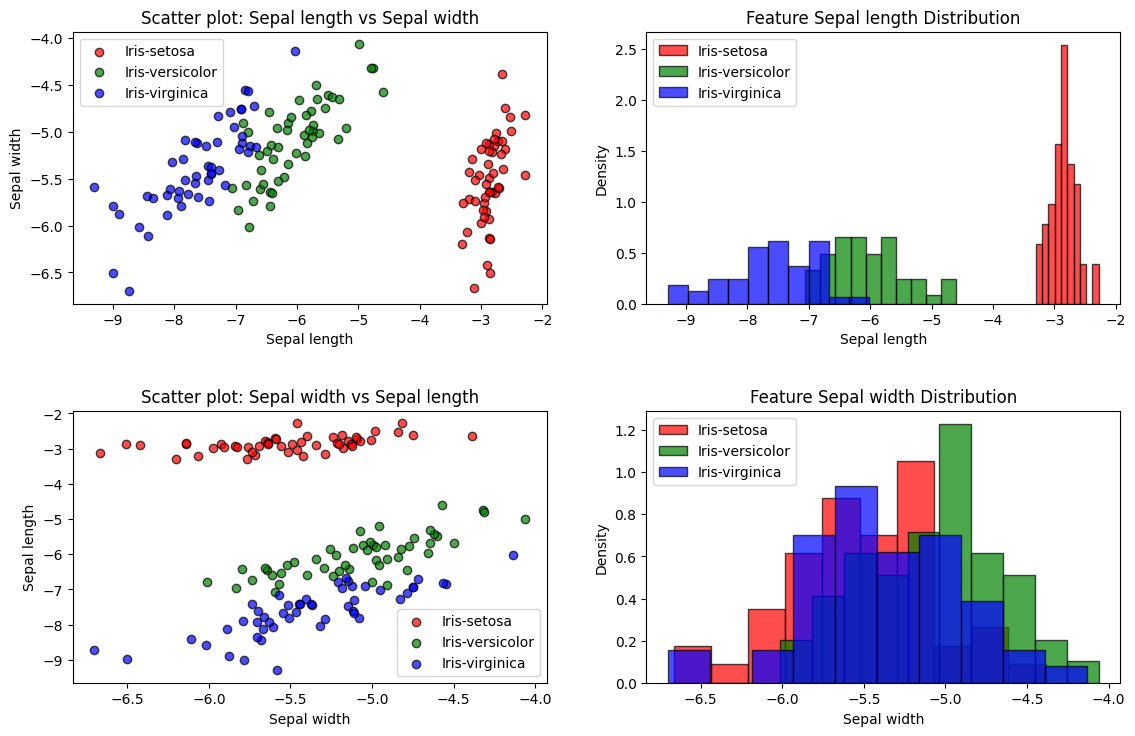

In [41]:
# Scatter Plot of the 2 components
scatterPlots2(DP_2, y, DP_2.shape[0])

**NOTE: your image may be flipped over one or both axes, due to the fact that eigenvectors are defined up to their sign. Flipping the sign of an eigenvector would result in a flipped image, but the solutions are equivalent.**

## LDA - Linear Discriminant Analysis

The goal is to compute the LDA Transformation Matrix, **W**. <br>
We start by computing the between and within class covariance matrices: <br> <br>
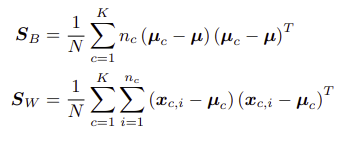


In [42]:
# select alla samples of class 0
D_c0 = D[:, L==0]
print(f"All samples of class 0:\n{D_c0}\n")
print(f"Shape: {D_c0.shape}")

All samples of class 0:
[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]
 [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
  1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
  1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
 [0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]]

Shape: (4, 50)


In [44]:
#Compute Sw, Sb

def computeSwSb(D, L):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - L: Labels of the samples

    Returned Values:
    - Sw: Within-class scatter matrix
    - Sb: Between-class scatter matrix
    '''

    #find the unique labels for each class
    uniqueLabels = np.unique(L)

    #nc in the formula is computed as the number of samples of class c
    #separate data into classes
    DC = [D[:, L == label] for label in uniqueLabels]  #DC[0] -> samples of class 0, DC[1] -> samples of class 1 etc...

    #compute nc for each class
    #each element in DC has a shape which is (4, DC_i.shape[1]) (assuming samples are not equally distributed among all the classes which is true in 99% of cases...)
    #So for nc I just have to take DC_i.shape[1] for each i in DC
    nc = [DC_i.shape[1] for DC_i in DC]

    #Compute the mean as done before with PCA
    mu = D.mean(axis=1)
    mu = mu.reshape((mu.shape[0], 1))

    #Now compute the mean for each class
    muC = [DC[label].mean(axis=1) for label, labelName in enumerate(uniqueLabels)]
    muC = [mc.reshape((mc.shape[0], 1)) for mc in muC]

    Sb = 0  #between matrix initialization
    Sw = 0  #within  matrix initialization

    #iterate over all the classes to execute the summations to calculate the 2 matrices
    for label, labelName in enumerate(uniqueLabels):

        #1) FOR SB:
        #add up to the Sb (between) matrix
        diff = muC[label] - mu
        Sb += nc[label] * (diff @ (diff.T)) #nc * ((muC - mu) * (muC - mu).T)


        #2) FOR SW
        #add up to the Sw (within) matrix
        #for diff1 subtract the the class mean from the samples of each class, i.e center center the samples for each class 
        diff1 = DC[label] - muC[label]  #x_{c, i} - muC done by rows

        #SHORTCUT: compute the Sw matrix as a weighted sum of the covariance matrices of each class
        #so for each class:
        #Compute the Covariance Matrix C using DC = D - mu
        C_i = (diff1 @ diff1.T) / float(diff1.shape[1])  #Covariance matrix for class i

        #weighted sum of all the C_i
        Sw += nc[label] * C_i

    
    #at the end of the summations, just multiply by 1/N (N is the number of samples)

    Sb = Sb / D.shape[1]
    Sw = Sw / D.shape[1]

    #return both matrices
    return Sb, Sw
        


In [44]:
Sb, Sw = computeSwSb(D, L)
print(f"Sb matrix:\n{Sb}\nShape:{Sb.shape}\n")
print(f"Sw matrix:\n{Sw}\nShape:{Sw.shape}")

Sb matrix:
[[ 0.42141423 -0.133018    1.1016563   0.47519568]
 [-0.133018    0.07563294 -0.3815974  -0.15288445]
 [ 1.1016563  -0.3815974   2.9140193   1.2451603 ]
 [ 0.47519568 -0.15288445  1.2451603   0.53608906]]
Shape:(4, 4)

Sw matrix:
[[0.25970796 0.09086665 0.16416402 0.03763333]
 [0.09086665 0.11308001 0.05413865 0.032056  ]
 [0.16416402 0.05413865 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.04104401]]
Shape:(4, 4)


Once matrices Sb, Sw are obtained, we need to compute the LDA directions, which are the columns of W matrix, so its eigen vectors.

### LDA Method 1: Generalized Eingenvalue problem

We need to compute: <br>
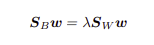 <br>

Sw is positive definite (all eigenvalues are greater than 0). To solve the **generalized Eigenvalue problem** `numpy.linalg.eigh` is not enough since it just supports one matrix. The `scipy.linalg.eigh`, on the other hand, supports two matrices (arguments a, b=None by default).

Doc: (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html) <br>
*scipy.linalg.eigh(a, b=None, \*, lower=True, eigvals_only=False, overwrite_a=False, overwrite_b=False, type=1, check_finite=True, subset_by_index=None, subset_by_value=None, driver=None)*. <br>
Solve a standard or generalized eigenvalue problem for a complex Hermitian or real symmetric matrix. <br>

Find eigenvalues array w and optionally eigenvectors array v of array a, where b is positive definite such that for every eigenvalue λ (i-th entry of w) and its eigenvector vi (i-th column of v) satisfies: <br>
              a @ vi = λ * b @ vi <br>
vi.conj().T @ a @ vi = λ    <br>
vi.conj().T @ b @ vi = 1    <br> <br>
Returns: <br>
w: <br>
(N,) ndarray <br>
The N (N<=M) selected eigenvalues, in ascending order, each repeated according to its multiplicity. <br>

v: <br>
(M, N) ndarray <br>
The normalized eigenvector corresponding to the eigenvalue w[i] is the column v[:,i]. Only returned if eigvals_only=False. <br>

In [47]:
import scipy as sc


def calculateLDA(D, L, m):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - L: Labels of the samples
    - m: number of discriminant directions of the target subplane

    Returned Values:
    - W: LDA matrix containing the most discriminant directions, which are the m leading Eigenvectors found solving the generalized Eigenvalues problem for matrices Sb, Sw
    '''

    #1) first, compute S between, S within matrices
    Sb, Sw = computeSwSb(D, L)

    #2) then, solve the generalized Eigenvalues problem
    #matrix a is Sb -> I wanna find the eigvalues of (Sw)^{-1} * Sb 
    #matrix b is Sw which is positive definite

    #sigma -> w ndarray of eigenvalues of inverse of matrix b * matrix a
    #U -> v ndarray of corresponding eigenvectors of invers of matrix b * matrix a -> they are sorted from lowest to highest as in the numpy counterpart!
    sigma, U = sc.linalg.eigh(a=Sb, b=Sw)

    #I don't mind about sigma since I want the LDA directions which are the eigenvectors of U
    #Take the leading m eigenvectors of U to create matrix W of LDA main directions (first I have to sort U from highest to lowest so the other way around):
    W = U[:, ::-1][:, 0:m]

    return W


def applyLDA(D, W):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - W: LDA matrix containing the most discriminant directions, which are the m leading Eigenvectors found solving the generalized Eigenvalues problem for matrices Sb, Sw

    Returned Values:
    - W: The projection of the dataset onto the subplane having the m most discriminant directions
    '''

    return W.T @ D




**Remember that we can compute at most 2 discriminant directions, since we have 3 classes!**

LDA Scatterplots:



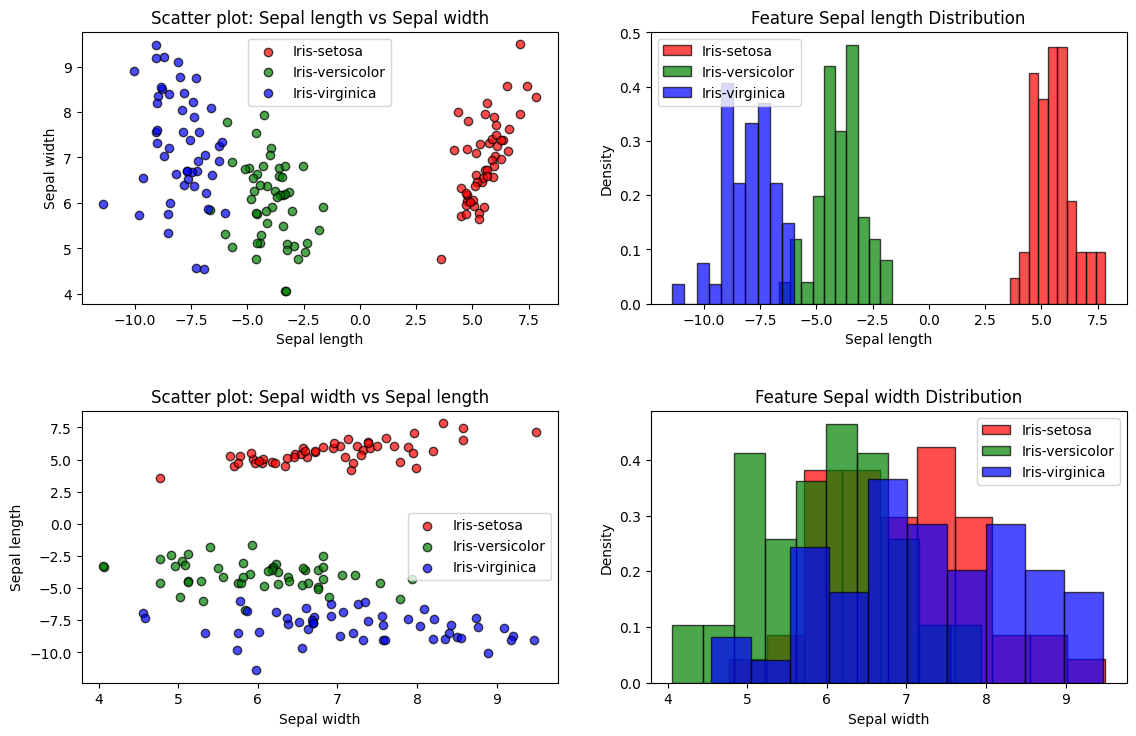

In [46]:
#Testing with m = 2 most discriminant directions
W_2 = calculateLDA(D, L, m=2)

DP_2_LDA = applyLDA(D, W_2)

print("LDA Scatterplots:\n")
scatterPlots2(DP_2_LDA, L, DP_2_LDA.shape[0])


PCA Scatterplots:



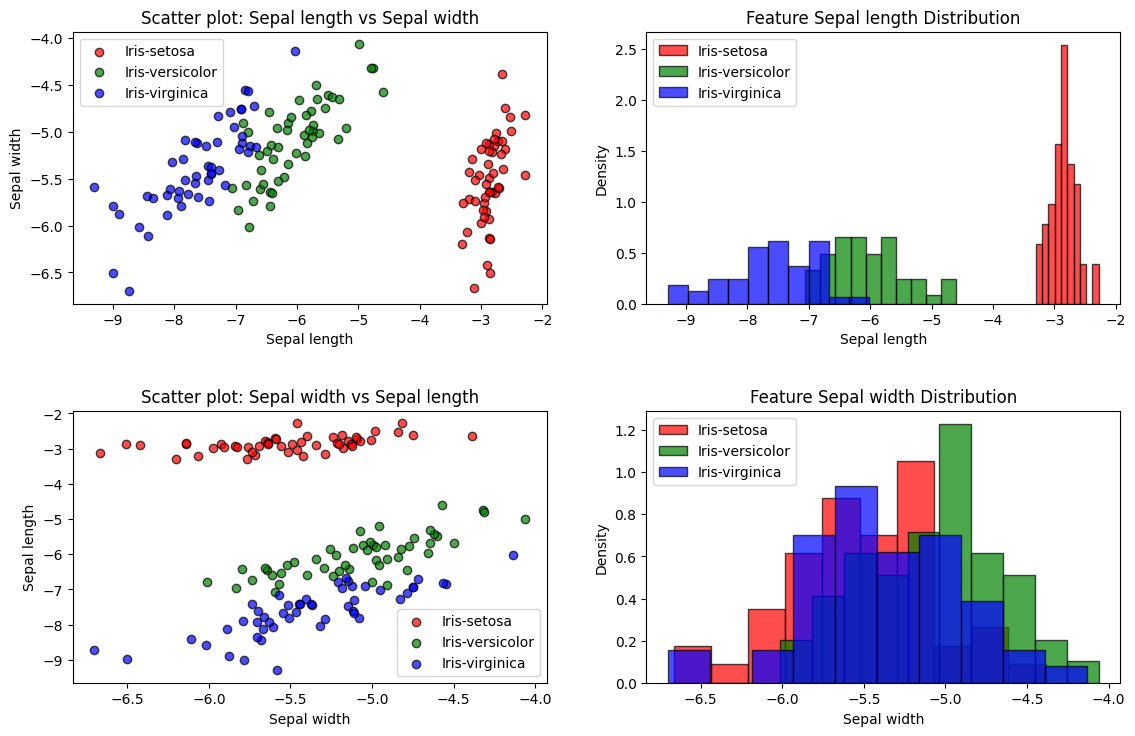

In [47]:
print("PCA Scatterplots:\n")
scatterPlots2(DP_2, L, DP_2.shape[0])

In [48]:
np.load("IRIS_LDA_matrix_m2.npy")

array([[ 0.83779794,  0.02434685],
       [ 1.55005187,  2.18649663],
       [-2.22355955, -0.94138258],
       [-2.83899363,  2.86801283]])

In [49]:
W_2

array([[ 0.83779967,  0.02432493],
       [ 1.55005   ,  2.186504  ],
       [-2.2235608 , -0.9413757 ],
       [-2.838992  ,  2.868018  ]], dtype=float32)

Wrt PCA, now the samples of class Iris-versicolor (green) are **more separated** from the samples belonging to class Iris-virginica (class blue)!

**Comparing Density plots of PCA (top) and LDA (bottom)**:

In [50]:
def densityPlots(x, y, numFeatures, title=None, bins=None):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 2
    rows = 1

    labelColors = {0: "red", 1: "green", 2: "blue"}
    classLabels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    featuresNames = {0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black", bins=bins)
            subplot.legend()
            subplot.set_title(f"Feature {featuresNames[i]} Distribution")
            subplot.set_xlabel(featuresNames[i])
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    if title:
        fig.suptitle(title, fontsize=16)  # General title
    plt.show()

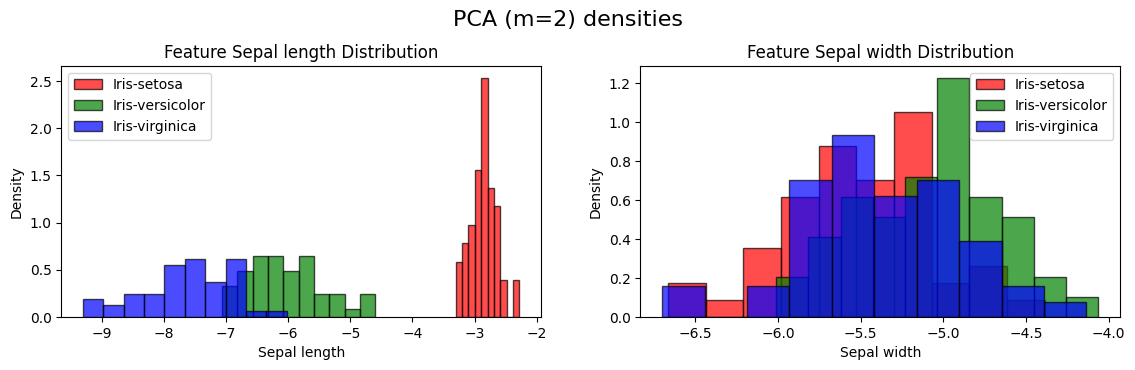

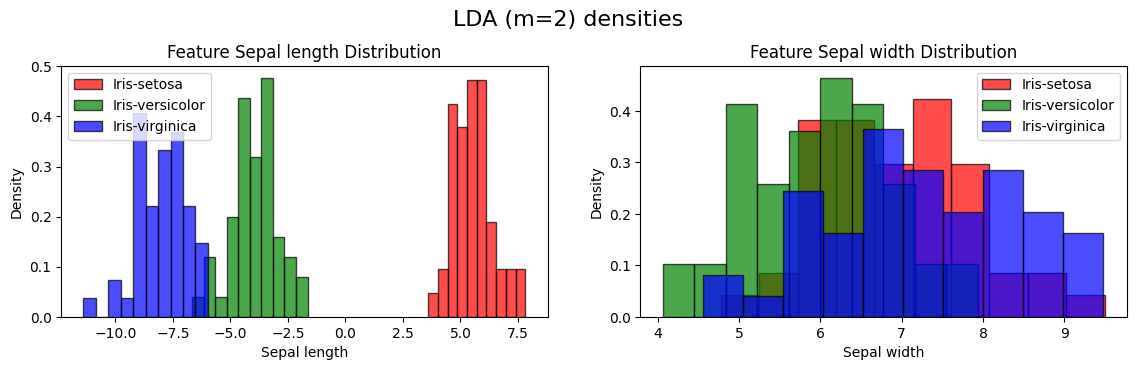

In [51]:
#PCA density plots 
densityPlots(DP_2, L, DP_2.shape[0], "PCA (m=2) densities")

#LDA density plota
densityPlots(DP_2_LDA, L, DP_2_LDA.shape[0], "LDA (m=2) densities") 

We can observe that the first LDA direction (x-axis in the scatter plots) results in lower overlapping of
the green and the orange classes, which can thus be better separated along this direction.

### LDA Method 2: Solving the Eigenvalue problem by joint diagonalization of Sb and Sw <br> 
A way to solve the generalized eigenvalue problem, and thus find
the LDA matrix W, consists in the **joint diagonalization of Sw and Sb that makes Sw become the identity matrix and Sb become a diagonal matrix**. <br>
This way the LDA computation, once having Sw and Sb (calculated with the function *computeSwSb(D, L)* defined before) is done by breaking the problem in two steps (each step corresponds to one transformation): 

1. Whiten Sw -> estimate matrix $P_{1}$ so that the within class covariance of the transormed points $P_{1} \cdot x$ is the identity. So we apply $P_{1} \cdot Sw \cdot P_{1}^{T}$ <br>
Here we can compute the Eigen decomposition and apply the whitening transformation which is simply elevate the sigma diagonal matrix to the power of $-1/2$: <br>
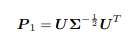 <br>
Where first I apply the SVD, then I elevate sigma to the power of $-1/2$.
Then I found P1 by calculating the dot product: $U \cdot sigma^{-1/2} \cdot U^{T}$. <br>
Then the transformed between class covariance $S_{BT}$ can be computed as: $S_{BT} = P_{1} \cdot Sb \cdot P_{1}^{T}$.

2. Projection on the leading eigenvectors of the transformed between class covariance Sb -> We finally need to compute the matrix $P_{2}$ of eigenvectors of $S_{BT}$ corresponding to its m highest eigenvalues.

At the end, the LDA matrix W is given by $W = P_{1}^{T} \cdot P_{2}$, and the LDA transformation is $y = W^{T} \cdot x$. Again, we can observe that the solution is not orthogonal.



Let's apply this second method:

In [41]:
def calculateLDAbyJointDiagonalization(D, L, m):
    '''
    Params:
    - D: Dataset features matrix, not ceCntered
    - L: Labels of the samples
    - m: number of discriminant directions of the target subplane

    Returned Values:
    - W: LDA matrix containing the most discriminant directions, calculated solving the generalized Eigenvalue problem by joint diagonalization of Sw and Sb
    '''

    #0) first, compute S between, S within matrices as before
    Sb, Sw = computeSwSb(D, L)

    #Joint diagonaization:

    #Step 1: Whiten Sw
    #Compute SVD on matrix Sw to find U and sigma (Vh is useless)
    U, sigma, Vh = np.linalg.svd(Sw)

    #U = matrix of singular vectors of Sw
    #sigma = matrix of singular values of Sw

    #Compute P1
    #sigma needs to be to the power of -1/2 first, then use dot products: 
    #a. compute U @ sigma^{1/2}
    #b. compute (U @ sigma^{1/2}) @ U.T
    P1 = U @ np.diag(1.0/(sigma**0.5)) @ U.T

    #Compute Sbt = Sbt = P1 @ Sb @P1 -> Sbt is the transformed between class covariance
    Sbt = P1 @ Sb @ P1.T

    #Compute P2, which is the matrix of eigenvectors of Sbt corresponding to its m highest eigenvalues -> so use SVD again
    U2, sigma2, Vh2 = np.linalg.svd(Sbt) #with SVD the eigvectors are already ordered from the highest to the lowest

    #just take the leading m eigvectors
    P2 = U2[:, 0:m]



    #Step 2: Find matrix W as W = P1.T @ P2
    return P1.T @ P2



#Already defined, it's the same as before
#def applyLDA(D, W):
#
#    return W.T @ D




In [53]:
#Testing the second method:
W_2_JointDiag = calculateLDAbyJointDiagonalization(D, L, m=2)

W_2_JointDiag


array([[-0.83779943, -0.02432996],
       [-1.5500509 , -2.1865053 ],
       [ 2.2235613 ,  0.9413737 ],
       [ 2.8389919 , -2.8680096 ]], dtype=float32)

In [54]:
#The 2 methods are equivalent BUT THE EIGVECTORS SIGN MAY CHANGE AS BEFORE:
W_2

array([[ 0.83779967,  0.02432493],
       [ 1.55005   ,  2.186504  ],
       [-2.2235608 , -0.9413757 ],
       [-2.838992  ,  2.868018  ]], dtype=float32)

In [55]:
DP_2_LDA_JointDiag = applyLDA(D, W_2_JointDiag)

LDA Scatterplots, Method 2 (Joint Diagonalization):



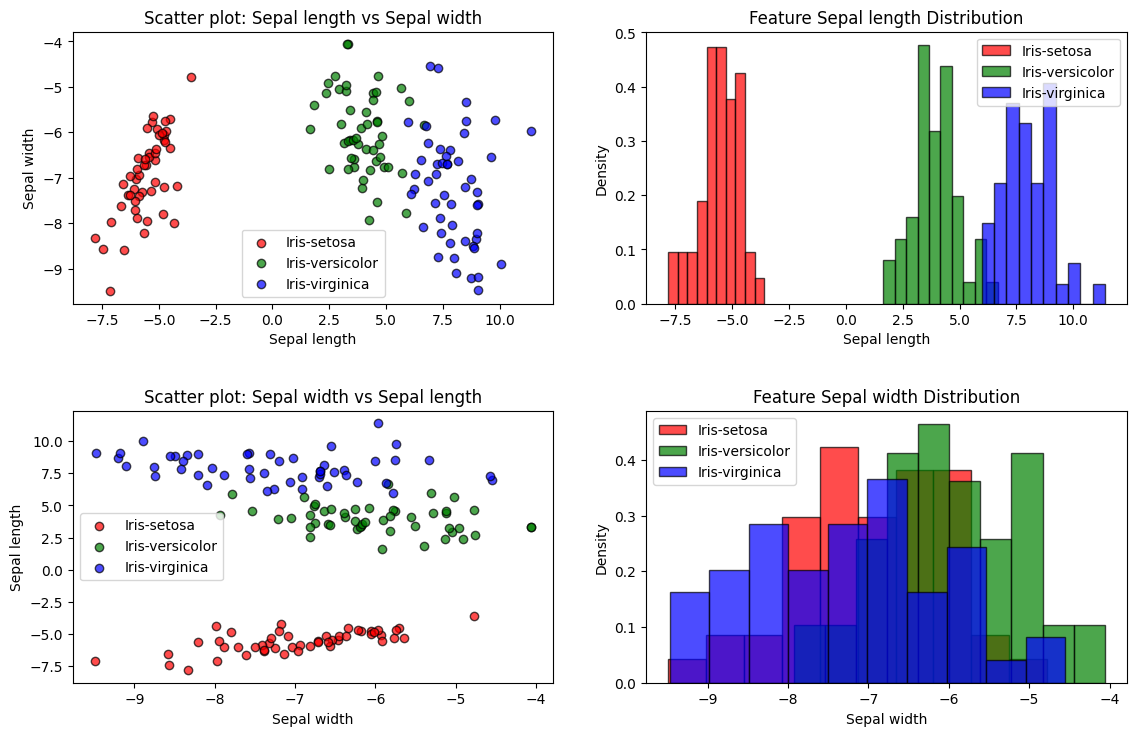

In [56]:
print("LDA Scatterplots, Method 2 (Joint Diagonalization):\n")
scatterPlots2(DP_2_LDA_JointDiag, L, DP_2_LDA_JointDiag.shape[0])

## PCA and LDA for classification

In this section we use PCA and LDA for **binary classification**. In particular, we just select 2 classes from the Iris Dataset (which are *Iris versicolor* and *Iris virginica* classes, whose labels are 1 and 2). <br>
So, at first we just select these two classes from the full dataset:

In [31]:
import sklearn
import sklearn.datasets

def loadIris2():
    """
    Function to load the iris dataset.

    Returned Values:
    D, L
    """
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

In [32]:
#Load Iris and extract just the classes labeled as 1, 2 (so discard Iris setosa, which has label 0)
D_fullIris, L_fullIris, = loadIris2()

print(f"D_fullIris has a shape of: {D_fullIris.shape}\nL_fullIris has a shape of: {L_fullIris.shape}")

D = D_fullIris[:, L_fullIris != 0]
L = L_fullIris[L_fullIris != 0]

print(f"D has a shape of: {D.shape}\nL has a shape of: {L.shape}")
   


D_fullIris has a shape of: (4, 150)
L_fullIris has a shape of: (150,)
D has a shape of: (4, 100)
L has a shape of: (100,)


In [33]:
#computeSwSb(D , L )
print(i for i in np.unique(L))

<generator object <genexpr> at 0x11f4cabc0>


In particular, we employ
LDA to identify the (single, since we have only 2 classes) discriminant direction of the two-class version
of the dataset (which, in general, may differ from the discriminant directions of the 3-class problem).
We will also employ PCA as a pre-processing for LDA.

We cannot
directly evaluate the performance of the model on the data that was used to learn the model parameters.
Indeed, the result may be **over-optimistic** (there's the risk of **OVERFITTING**), since the real data that we will want to classify will be data
that has not been seen during training. To reduce the bias, we therefore need to simulate an application
scenario, i.e. we want to evaluate the model on data that was not used during training.


So, we begin by splitting the data into **training data** and **validation data**. <br>
We'll use a simple random split assigning $2/3$ of the samples to the training data and the remaining part to the validation data:

In [34]:
D.shape[1]

100

In [35]:
np.random.permutation(D.shape[1])

array([49, 78, 45, 35, 93, 30, 62,  5, 12, 11, 26, 99, 84, 22,  4, 52, 88,
       90,  9, 25, 66, 96,  7, 42, 21, 34, 24, 83, 85,  1, 69, 55,  2, 92,
       97, 59, 29, 48, 41, 33, 76, 51, 72, 54, 32, 77, 60, 74, 46, 86, 58,
       94, 27, 64, 80, 43, 36,  0, 28, 16, 14, 20, 56, 63, 65, 18, 38,  8,
       13, 67, 61, 95, 50,  6, 19, 71, 37, 47, 68, 91, 81, 15, 23, 39, 82,
       31, 53, 89, 17, 98, 10,  3, 79, 75, 87, 40, 73, 70, 44, 57])

In [36]:
def splitTrainingValidation(percentageTraining, D, L, seed=0):
    """"
    Function to splot the data into 2 partitions: the training one and the validation one.
    The splitting is done randomly so the seed needs to be initialized first.

    Params:
    - percentageTraining: percentage of training data over the overall data 
    - D
    - L
    - seed: valie of the seed for the random split, default is 0

    Returned Values:
    - (DTR, LTR), (DVAL, LVAL):
        DTR and LTR are model training data and labels
        DVAL and LVAL are validation data and labels
    """

    #set cardinality of training partition
    #Obviously since we cannot have fractional samples, this number is rounded
    nTrain = int(D.shape[1] * percentageTraining)

    #initialize the seed for the random split
    np.random.seed(seed)

    #shuffle the data indices by making a random permutation
    """
    example of usage: 
    np.random.permutation(100) returns: 
    array([45, 97, 37, 87, 36,  7,  0, 23, 24, 31, 75, 35, 68, 53, 65,  8, 84,
       41, 20, 56, 81, 12, 47, 72, 63, 38,  6, 58, 91, 48, 92, 88, 71, 29,
       46, 10, 14, 18, 27, 98, 67, 76, 78, 54, 90, 17, 50, 55,  4, 21, 19,
       32, 95, 15,  5, 64, 93, 69, 52, 89,  2, 42, 43, 82, 44, 99, 85, 13,
       34, 94, 74, 80, 70,  3, 77, 73,  1, 11, 28, 16, 62, 96, 22, 66, 49,
       57, 60, 51,  9, 59, 26, 33, 39, 61, 79, 86, 40, 83, 25, 30],
      dtype=int32)
    """

    shuffledIndices = np.random.permutation(D.shape[1])

    #Split randomically accordin to the percentage
    #TRAINING DATA
    DTR = D[:, shuffledIndices[0:nTrain]]
    LTR = L[shuffledIndices[0:nTrain]]

    #VALIDATION DATA
    DVAL = D[:, shuffledIndices[nTrain:]]
    LVAL = L[shuffledIndices[nTrain:]]

    return (DTR, LTR), (DVAL, LVAL)




In [37]:
#Execute the train validation split
trainingPercentage = 2.0/3.0
(DTR, LTR), (DVAL, LVAL) = splitTrainingValidation(trainingPercentage, D, L)


print(f"Shape of training DTR, LTR: {DTR.shape}, {LTR.shape}\n")
print(f"Shape of validation DVAL, LVAL: {DVAL.shape}, {LVAL.shape}\n")


Shape of training DTR, LTR: (4, 66), (66,)

Shape of validation DVAL, LVAL: (4, 34), (34,)



In [38]:
print("Class labels in training set:", np.unique(LTR))
print("Class labels in validation set:", np.unique(LVAL))

Class labels in training set: [1 2]
Class labels in validation set: [1 2]


In [45]:
#Apply LDA with m = 1
#Here I use the Joint Diagonalization method, but it's the same with the standard method
W_1_JointDiag = calculateLDAbyJointDiagonalization(DTR, LTR, m=1)

print(f"LDA W Matrix with m = 1 (Joint Diagonalization method):\n{W_1_JointDiag}")
print(f"W_1_JointDiag has a shape of: {W_1_JointDiag.shape}")



LDA W Matrix with m = 1 (Joint Diagonalization method):
[[-0.88381021]
 [-1.56103706]
 [ 1.46175793]
 [ 4.051348  ]]
W_1_JointDiag has a shape of: (4, 1)


In [48]:
# Apply the LDA -> Project the VALIDATION samples
DVAL_lda = applyLDA(DVAL, W_1_JointDiag)

print(f"DVAL Projected:\n {DVAL_lda}")
print(f"Shape: {DVAL_lda.shape}")

DVAL Projected:
 [[1.22157421 4.40779293 1.05273626 5.46381825 1.30540887 0.07108617
  1.85133791 5.27595965 6.42444388 4.64866882 4.0990656  7.38743946
  6.7202317  4.38068676 1.58736349 2.5400977  4.54390522 1.84141
  2.35023528 6.41371346 5.9465013  1.16123689 4.32289199 6.55651152
  4.83649475 2.18654094 1.35163803 3.59307931 2.56212994 5.53575384
  5.96946424 7.68119762 1.54568069 2.24199843]]
Shape: (1, 34)


In [49]:
# Apply the LDA -> Project the TRAINING samples
DTR_lda = applyLDA(DTR, W_1_JointDiag)

print(f"DTR Projected:\n {DTR_lda}")
print(f"Shape: {DTR_lda.shape}")

DTR Projected:
 [[2.30751203 7.03354924 2.30213048 6.75536432 4.70422183 6.93724413
  3.02248429 4.67223584 6.96328401 6.31460201 5.38325897 5.81162733
  6.66638606 2.62389968 0.79799017 1.4037178  3.76903885 1.36891864
  4.41946088 1.63068398 0.86571285 5.85447877 2.66244269 5.94506888
  1.28017149 0.43173184 2.63299241 4.84980039 7.07152086 4.45833736
  4.81757645 5.70318521 7.14833628 8.5401951  5.81162733 3.59144162
  3.74102782 5.23193958 6.47117477 5.76690026 2.00322871 5.57369279
  1.52385371 2.32162018 2.68543831 1.34287876 0.7036562  2.37369995
  1.62751152 2.43604108 5.83556047 7.0619264  1.36015937 3.19924634
  2.82506391 8.17949092 2.31881385 2.44968018 1.96973378 6.17403887
  1.62637556 0.85240721 4.90421743 5.52267931 3.91380806 6.74637393]]
Shape: (1, 66)


So, to recap:
1. LDA was calculated on just the *training* samples, DTR and LTR
2. Then I apply the model on the *validation* samples, DVAL and LVAL
3. I also apply the model on the training samples to plot the two results and confront them

In [50]:
def densityPlots_TR_VAL(xTR, yTR, xVAL, yVAL, title1=None, bins1=None, title2=None, bins2=None, title=None, xlabel="LDA direction"):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 2
    rows = 1

    labelColors = {1: "green", 2: "blue"}
    classLabels = {1: 'Iris-versicolor', 2: 'Iris-virginica'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplot = plots[0]
    for label in labelColors:
        sample_with_that_class = xTR[0, yTR == label]
        subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black", bins=bins1)
        subplot.legend()
        if title1:
            subplot.set_title(title1)
        subplot.set_xlabel(xlabel)
        subplot.set_ylabel("Density")


    subplot = plots[1]
    for label in labelColors:
        sample_with_that_class = xVAL[0, yVAL == label]
        subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black", bins=bins2)
        subplot.legend()
        if title2:
            subplot.set_title(title2)
        subplot.set_xlabel(xlabel)
        subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    if title:
        fig.suptitle(title, fontsize=16)  # General title
    plt.show()

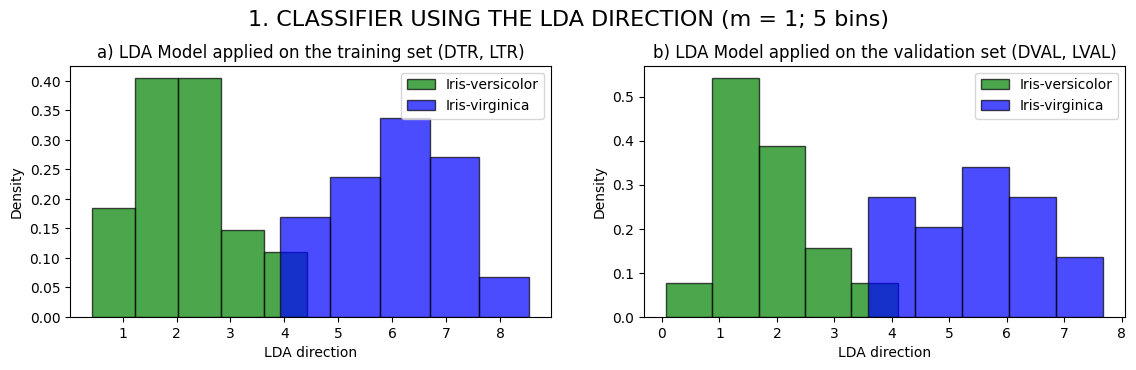

In [51]:
densityPlots_TR_VAL(DTR_lda, LTR, DVAL_lda, LVAL, title1="a) LDA Model applied on the training set (DTR, LTR)", bins1=5, title2="b) LDA Model applied on the validation set (DVAL, LVAL)", bins2=5, title="1. CLASSIFIER USING THE LDA DIRECTION (m = 1; 5 bins)")

In [52]:
print(f"Mean of the class 1 (Iris-versicolor) of training samples over the LDA direction: {DTR_lda[0,LTR==1].mean()}")  #Mean of the class 1 (Iris-versicolor) of training samples

print(f"Mean of the class 2 (Iris-virginica) of training samples over the LDA direction: {DTR_lda[0,LTR==2].mean()}\n\n")  #Mean of the class 2 (Iris-virginica) of training samples


print(f"Mean of the class 1 (Iris-versicolor) of validation samples over the LDA direction: {DVAL_lda[0,LVAL==1].mean()}")  #Mean of the class 1 (Iris-versicolor) of validation samples

print(f"Mean of the class 2 (Iris-virginica) of validation samples over the LDA direction: {DVAL_lda[0,LVAL==2].mean()}")  #Mean of the class 2 (Iris-virginica) of validation samples


Mean of the class 1 (Iris-versicolor) of training samples over the LDA direction: 2.1314931222050686
Mean of the class 2 (Iris-virginica) of training samples over the LDA direction: 6.025740722889744


Mean of the class 1 (Iris-versicolor) of validation samples over the LDA direction: 1.8105962758208631
Mean of the class 2 (Iris-virginica) of validation samples over the LDA direction: 5.561586371815911


since the LDA direction is defined up to its sign, in order to perform classification we need
to fix the orientation and choose a threshold, so that we can properly label samples above and below
the selected threshold. In the following we choose the orientation that results in the Virginica class
being on the right of the plot, i.e., in the mean of the projected samples of the Viriginica class being
higher than the mean of the projected samples of the Versicolor class.

To choose the threshold, for the moment we simply employ the mean of the
projected class means, *computed on the model training data*:

In [71]:
#Since the projected samples have only one dimension, we can calculate the mean of the mean of the 2 classes simply like this (without a for loop):
threshold = (DTR_lda[0, LTR==1].mean() + DTR_lda[0, LTR==2].mean()) / 2.0

print(f"Selected threshold is: {threshold}")

Selected threshold is: 4.07861692254741


**Look that this value (4.07) is simply the value separating at most the two classes in the chart of the LDA model applied on the training set (DTR, LTR)!**

### 1. Proper Classification (with just LDA)

In order to build the proper classifier rule, we simply compare each projected sample to the threshold:
- elements located at the right of the threshold -> classified as **class 2** (*Iris-virginica*)
- elements located at the left of the threshold -> classified as **class 1** (*Iris-versicolor*)

**The classification is applied JUST on the validation samples** Since the model was trained using the training samples, so we apply the classification rule to the validation samples which are data that the model has **never seen** before.

In [72]:
DVAL_lda[0]

array([1.22157421, 4.40779293, 1.05273626, 5.46381825, 1.30540887,
       0.07108617, 1.85133791, 5.27595965, 6.42444388, 4.64866882,
       4.0990656 , 7.38743946, 6.7202317 , 4.38068676, 1.58736349,
       2.5400977 , 4.54390522, 1.84141   , 2.35023528, 6.41371346,
       5.9465013 , 1.16123689, 4.32289199, 6.55651152, 4.83649475,
       2.18654094, 1.35163803, 3.59307931, 2.56212994, 5.53575384,
       5.96946424, 7.68119762, 1.54568069, 2.24199843])

In [73]:
#Build the model rule and apply it JUST on the VALIDATION SAMPLES

#Build an array to contain the predicted results, havinh shape equal to LVAL (34, )
#At the begoinning it's preallocated with all zero
#Later on it will store just 1 (class 1) or 2 (class 2)
PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)

#Classification rule:
#- elements located at the right of the threshold -> classified as **class 2** (*Iris-virginica*)
#- elements located at the left of the threshold -> classified as **class 1** (*Iris-versicolor*)

PVAL[DVAL_lda[0] >= threshold] = 2   #AT THE RIGHT OF THRESHOLD -> CLASS 2
PVAL[DVAL_lda[0] < threshold] = 1   #AT THE LEFT OF THRESHOLD -> CLASS 1



In [74]:
print(f"Predictions: {PVAL}")
print(f"Actual classes: {LVAL}")

Predictions: [1 2 1 2 1 1 1 2 2 2 2 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 1 1 2 2 2 1 1]
Actual classes: [1 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]


Error rate calculation for the LDA model:

In [75]:
#Confront the predictions to teh actual classes:

error_count = np.count_nonzero(PVAL != LVAL)
print(f"Number of wrong predictions: {error_count}")
error_rate = np.mean(PVAL != LVAL)
print(f"Error Rate: {error_rate:.2%}")


Number of wrong predictions: 2
Error Rate: 5.88%


Accuracy, Precision, Recall, F-1 Score for the LDA model:

In [76]:
from sklearn.metrics import classification_report

print(classification_report(LVAL, PVAL, digits=3))


              precision    recall  f1-score   support

           1      0.938     0.938     0.938        16
           2      0.944     0.944     0.944        18

    accuracy                          0.941        34
   macro avg      0.941     0.941     0.941        34
weighted avg      0.941     0.941     0.941        34



In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(LVAL, PVAL, average='weighted')  # O 'macro' / 'micro'
recall = recall_score(LVAL, PVAL, average='weighted')
f1 = f1_score(LVAL, PVAL, average='weighted')
accuracy = accuracy_score(LVAL, PVAL)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

Accuracy: 94.12%
Precision: 94.12%
Recall: 94.12%
F1-score: 94.12%


### 2. Classification using the PCA direction

Now I train the classifier using the PCA direction in place of the LDA direction. <br>
As done with the LDA model, the model is trained on just the *training samples* (DTR, LTR) and then applied on the *validation samples* (DVAL, LVAL):

In [78]:
#Apply PCA with m = 1
#For PCA there's just one method, as used before:
P_1 = calculatePCA(DTR, m=1)

print(f"PCA P Matrix with m = 1:\n{P_1}")
print(f"P_1 has a shape of: {P_1.shape}")


PCA P Matrix with m = 1:
[[-0.57360601]
 [-0.16667285]
 [-0.73315983]
 [-0.3250738 ]]
P_1 has a shape of: (4, 1)


**We change the sign of the PCA matrix** So that we can compare this model with the LDA model which has the Iris-versicolor class on the left (= with a lower mean) and the Iris-virginica class on the right (= with a higher mean)! 

In [79]:
P_1 *=-1

In [80]:
# Apply the PCA -> Project the VALIDATION samples
DVAL_pca = applyPCA(DVAL, P_1)

print(f"DVAL Projected:\n {DVAL_pca}")
print(f"Shape: {DVAL_pca.shape}")

DVAL Projected:
 [[ 7.02634342  8.49314441  6.75751622  9.11628533  6.84578027  6.59403684
   7.16478945  8.6910363   8.82977774  7.96172615  8.02192857  9.38487617
  10.44576868  8.17663119  7.96682475  7.64556458 10.50721478  7.25477272
   6.92675041  8.83784839  9.09730221  7.06602942  8.0459546   9.41791532
   8.80527617  8.29330797  7.32091587  8.30712764  6.74719458  8.31383933
  10.67745629  8.31289106  7.6148917   7.16407755]]
Shape: (1, 34)


In [81]:
# Apply the PCA -> Project the TRAINING samples
DTR_pca = applyPCA(DTR, P_1)

print(f"DTR Projected:\n {DTR_pca}")
print(f"Shape: {DTR_pca.shape}")

DTR Projected:
 [[ 8.34147532  9.06627769  8.55466114 10.38093405  9.64740818  9.50718669
   7.49904211  8.24135053  9.19594696  8.90327964  8.78789698  8.13368688
   8.92611244  7.88330242  5.9551855   6.6984364   8.11049382  7.72961291
   8.15088594  8.06428206  5.99587882  9.11557343  6.89341584  7.92150837
   7.23893262  5.89913342  8.12970752  8.20854195  8.95861982  8.12734123
   8.65105488  9.8012836   9.24571823 10.65658822  8.13368688  8.56160339
   7.70986744  7.07919624  8.0021831   9.25484665  7.99126149  8.62448245
   7.08299212  7.82665372  8.05526893  8.04085264  7.10796063  7.20417425
   7.14076342  7.45805338  8.96135214 10.01494496  8.44954968  7.38432091
   7.71181723  9.37538171  7.45117596  7.82766103  7.80162037  9.58091916
   6.09250893  6.59261304  8.84596949  9.87471487  9.40242688 10.13672949]]
Shape: (1, 66)


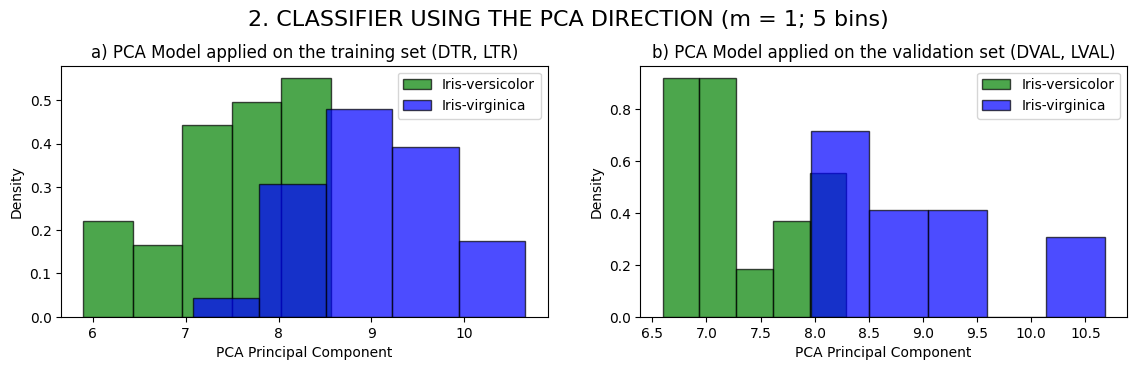

In [82]:
densityPlots_TR_VAL(DTR_pca, LTR, DVAL_pca, LVAL, title1="a) PCA Model applied on the training set (DTR, LTR)", bins1=5, title2="b) PCA Model applied on the validation set (DVAL, LVAL)", bins2=5, title="2. CLASSIFIER USING THE PCA DIRECTION (m = 1; 5 bins)", xlabel = "PCA Principal Component")

By looking at these 2 new charts and comparing them with the LDA Model charts it's clear that this model is less effective since the 2 class **overlap** more. Let's look at the class means:

In [83]:
print(f"Mean of the class 1 (Iris-versicolor) of training samples over the PCA direction: {DTR_pca[0,LTR==1].mean()}")  
print(f"Mean of the class 2 (Iris-virginica) of training samples over the PCA direction: {DTR_pca[0,LTR==2].mean()}\n\n")  


print(f"Mean of the class 1 (Iris-versicolor) of validation samples over the PCA direction: {DVAL_pca[0,LVAL==1].mean()}")  

print(f"Mean of the class 2 (Iris-virginica) of validation samples over the PCA direction: {DVAL_pca[0,LVAL==2].mean()}")  


Mean of the class 1 (Iris-versicolor) of training samples over the PCA direction: 7.4892695401955836
Mean of the class 2 (Iris-virginica) of training samples over the PCA direction: 9.023848243134667


Mean of the class 1 (Iris-versicolor) of validation samples over the PCA direction: 7.275670270127734
Mean of the class 2 (Iris-virginica) of validation samples over the PCA direction: 8.967892875376783


In [84]:
#Compare how far (on avg considering both TR and VAL samples) are the means for both LDA and PCA models:

#LDA mean distances:
LDA_DTR_mean1 = DTR_lda[0, LTR==1].mean()
LDA_DTR_mean2 = DTR_lda[0, LTR==2].mean()
LDA_DVAL_mean1 = DVAL_lda[0, LVAL==1].mean()
LDA_DVAL_mean2 = DVAL_lda[0, LVAL==2].mean()

#Avg mean distance of mean1, mean2 for LDA:
LDA_AvgMeanDistance = (abs(LDA_DTR_mean1 - LDA_DTR_mean2) + abs(LDA_DVAL_mean1 - LDA_DVAL_mean2)) / 2.0
print(f"Avg Mean distance for LDA: {LDA_AvgMeanDistance}")


#PCA mean distances:
PCA_DTR_mean1 = DTR_pca[0, LTR==1].mean()
PCA_DTR_mean2 = DTR_pca[0, LTR==2].mean()
PCA_DVAL_mean1 = DVAL_pca[0, LVAL==1].mean()
PCA_DVAL_mean2 = DVAL_pca[0, LVAL==2].mean()

#Avg mean distance of mean1, mean2 for PCA:
PCA_AvgMeanDistance = (abs(PCA_DTR_mean1 - PCA_DTR_mean2) + abs(PCA_DVAL_mean1 - PCA_DVAL_mean2)) / 2.0
print(f"Avg Mean distance for PCA: {PCA_AvgMeanDistance}")

print(f"Ratio: {LDA_AvgMeanDistance / PCA_AvgMeanDistance :.2}")


Avg Mean distance for LDA: 3.822618848339859
Avg Mean distance for PCA: 1.6134006540940664
Ratio: 2.4


**Important Comment:**  <br>
The LDA model shows a significanlty higher (more than double) distance between class means compared to PCA, so as a matter of fact the classes are on avg more separated and far from each other!. This indicates that the **LDA model is more effective in separating the classes than PCA**. <br>
This result is consistent with the nature of the two methods:
1. LDA is designed to maximize class separation by finding a projection that optimizes the distance between their means.
2. PCA, on the other hand, reduces dimensionality by preserving maximum variance but does not take class labels into account, so the separation may not be optimal for classification.


Now, let's train the PCA classifier to furher verify this:  <br>
We calculate and use the exact same threshold (the mean of the
projected class means, computed on the model *training data*) as done with LDA: 

In [85]:
#Since the projected samples have only one dimension, we can calculate the mean of the mean of the 2 classes simply like this (without a for loop):
threshold_pca = (DTR_pca[0, LTR==1].mean() + DTR_pca[0, LTR==2].mean()) / 2.0

print(f"Selected threshold is: {threshold_pca}")

Selected threshold is: 8.256558891665126


We also use the same classification rule:

In [86]:
#Build the model rule and apply it JUST on the VALIDATION SAMPLES

#Build an array to contain the predicted results, having shape equal to LVAL (34, )
#At the begoinning it's preallocated with all zero
#Later on it will store just 1 (class 1) or 2 (class 2)
PVAL_pca = np.zeros(shape=LVAL.shape, dtype=np.int32)

#Classification rule:
#- elements located at the right of the threshold -> classified as **class 2** (*Iris-virginica*)
#- elements located at the left of the threshold -> classified as **class 1** (*Iris-versicolor*)

PVAL_pca[DVAL_pca[0] >= threshold_pca] = 2   #AT THE RIGHT OF THRESHOLD -> CLASS 2
PVAL_pca[DVAL_pca[0] < threshold_pca] = 1   #AT THE LEFT OF THRESHOLD -> CLASS 1

In [87]:
print(f"Predictions: {PVAL_pca}")
print(f"Actual classes: {LVAL}")

Predictions: [1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2 1 2 1 2 2 2 1 1]
Actual classes: [1 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]


Error calculation for the PCA model:

In [88]:
#Confront the predictions to teh actual classes:

error_count_pca = np.count_nonzero(PVAL_pca != LVAL)
print(f"Number of wrong predictions: {error_count_pca}")
error_rate_pca = np.mean(PVAL_pca != LVAL)
print(f"Error Rate: {error_rate_pca:.2%}")


Number of wrong predictions: 4
Error Rate: 11.76%


Error rate is worse (11.8% vs 4%), as expected.

Accuracy, Precision, Recall, F-1 Score for the PCA model:

In [89]:

print(classification_report(LVAL, PVAL_pca, digits=3))


              precision    recall  f1-score   support

           1      0.833     0.938     0.882        16
           2      0.938     0.833     0.882        18

    accuracy                          0.882        34
   macro avg      0.885     0.885     0.882        34
weighted avg      0.888     0.882     0.882        34



Accuracy is worse, overall precisions, recalls and f1-scores are worse, as expected.

### 3. Classifier combining PCA for dimensionality reduction maximizing variance, and LDA for the most discriminant direction

In this third case I apply PCA *before* LDA to reduce the feature size to either 2 or 3 dimensions (reducing to 1
dimension makes LDA irrelevant, whereas reducing to 4 dimensions does not change the LDA subspace). So I use a simple **pipeline** for this model.<br>
As always, the full pipelined model is trained on the *training samples* (DTR, LTR) and tested on the *validation samples* (DVAL, LVAL).

Here is the full pipeline for both the training and validation samples: <br> <br>
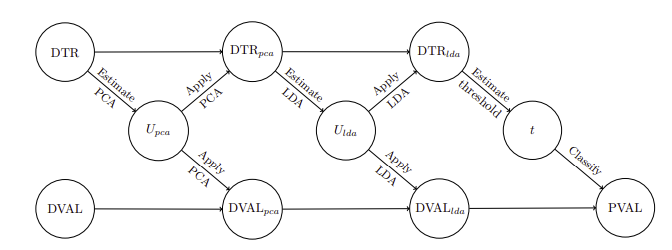

In [90]:
#At the beginning the samples have 4 dimensions:
print(f"DTR has a shape of: {DTR.shape}")
print(f"Dimensions (= features): {DTR.shape[0]}")

DTR has a shape of: (4, 66)
Dimensions (= features): 4


#### Pipeline Step 1: I use PCA to get to m_pca = 2 dimensions

In [91]:
#STEP 1: 
m_model3 = 2
P_2_model3 = calculatePCA(DTR, m=m_model3)

#We change its sign as before to have the Iris-versicolor class on the left and the Iris-virginica on the right
P_2_model3 *= -1

print(f"PCA P Matrix with m = 2:\n{P_2_model3}")
print(f"P_2 has a shape of: {P_2_model3.shape}")

PCA P Matrix with m = 2:
[[ 0.57360601 -0.7592958 ]
 [ 0.16667285 -0.08571837]
 [ 0.73315983  0.38358297]
 [ 0.3250738   0.51863894]]
P_2 has a shape of: (4, 2)


In [92]:
# Apply the PCA -> Project the VALIDATION samples
DVAL_pca_model3 = applyPCA(DVAL, P_2_model3)

print(f"DVAL Projected:\n {DVAL_pca_model3}")
print(f"Shape: {DVAL_pca_model3.shape}")


DVAL Projected:
 [[ 7.02634342  8.49314441  6.75751622  9.11628533  6.84578027  6.59403684
   7.16478945  8.6910363   8.82977774  7.96172615  8.02192857  9.38487617
  10.44576868  8.17663119  7.96682475  7.64556458 10.50721478  7.25477272
   6.92675041  8.83784839  9.09730221  7.06602942  8.0459546   9.41791532
   8.80527617  8.29330797  7.32091587  8.30712764  6.74719458  8.31383933
  10.67745629  8.31289106  7.6148917   7.16407755]
 [-2.51701493 -1.98041299 -2.44551045 -2.34437816 -2.39987599 -2.68967449
  -2.3210767  -2.16066849 -1.73485882 -2.04848195 -1.97939566 -1.88713221
  -2.47930532 -2.07575285 -2.85464781 -2.6187201  -2.83195774 -2.29129024
  -2.18186033 -1.90793261 -2.14324647 -2.6913844  -2.03818157 -2.13414732
  -2.08196364 -2.77221044 -2.66315332 -2.28934342 -1.95770966 -2.09453063
  -2.4612959  -1.44292048 -2.63257984 -2.19821699]]
Shape: (2, 34)


In [93]:
# Apply the PCA -> Project the TRAINING samples
DTR_pca_model3 = applyPCA(DTR, P_2_model3)

print(f"DTR Projected:\n {DTR_pca_model3}")
print(f"Shape: {DTR_pca_model3.shape}")

DTR Projected:
 [[ 8.34147532  9.06627769  8.55466114 10.38093405  9.64740818  9.50718669
   7.49904211  8.24135053  9.19594696  8.90327964  8.78789698  8.13368688
   8.92611244  7.88330242  5.9551855   6.6984364   8.11049382  7.72961291
   8.15088594  8.06428206  5.99587882  9.11557343  6.89341584  7.92150837
   7.23893262  5.89913342  8.12970752  8.20854195  8.95861982  8.12734123
   8.65105488  9.8012836   9.24571823 10.65658822  8.13368688  8.56160339
   7.70986744  7.07919624  8.0021831   9.25484665  7.99126149  8.62448245
   7.08299212  7.82665372  8.05526893  8.04085264  7.10796063  7.20417425
   7.14076342  7.45805338  8.96135214 10.01494496  8.44954968  7.38432091
   7.71181723  9.37538171  7.45117596  7.82766103  7.80162037  9.58091916
   6.09250893  6.59261304  8.84596949  9.87471487  9.40242688 10.13672949]
 [-2.83593011 -1.68220791 -2.84735301 -2.40701381 -2.50618063 -1.98150114
  -2.00512982 -2.2018965  -1.82679092 -2.15693597 -1.95053209 -1.69366811
  -1.86229815 -2.3513

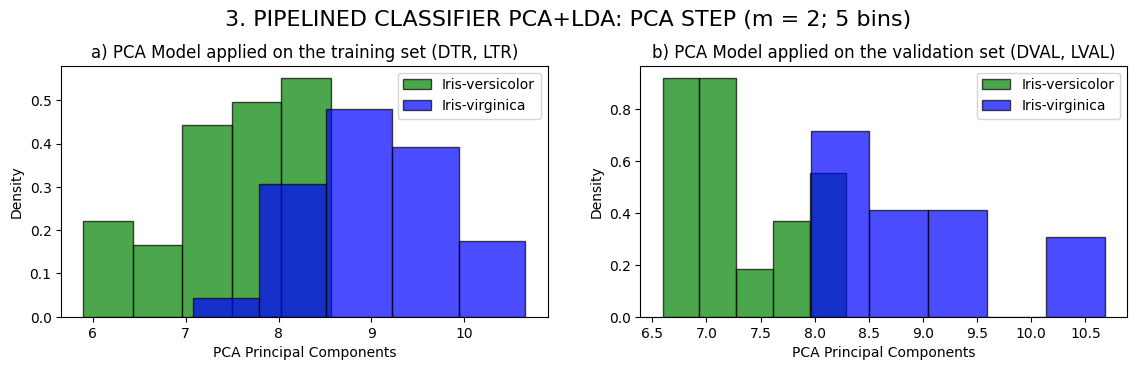

In [94]:
densityPlots_TR_VAL(DTR_pca_model3, LTR, DVAL_pca_model3, LVAL, title1="a) PCA Model applied on the training set (DTR, LTR)", bins1=5, title2="b) PCA Model applied on the validation set (DVAL, LVAL)", bins2=5, title=f"3. PIPELINED CLASSIFIER PCA+LDA: PCA STEP (m = {m_model3}; 5 bins)", xlabel = "PCA Principal Components")

If `m_model3 = 3` was used, the charts would be this: <br> <br>
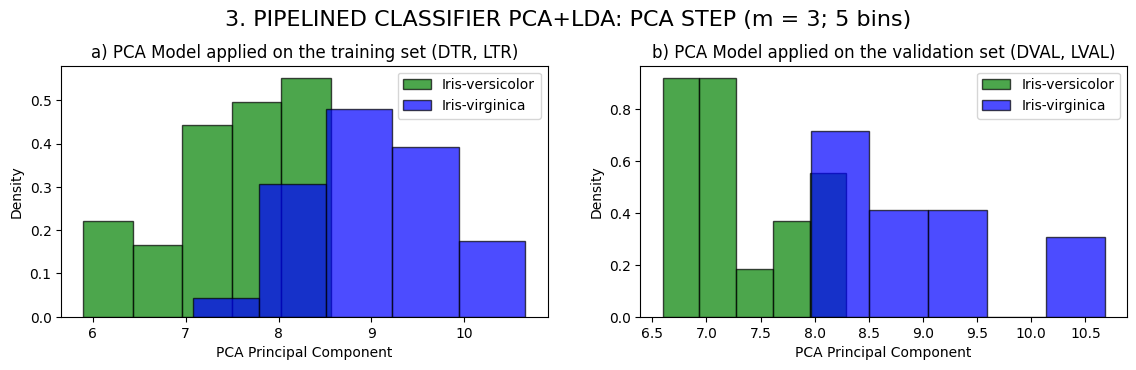 <br>
So, no difference from `m_model3 = 2`, this means that the thid direction is pretty *useless*.


#### Pipeline Step 2: I use LDA trained on the `DTR_pca_model3` samples to get a better separation between classes

In [95]:
# STEP 2: compute and appy LDA

#Apply LDA with m_lda = 1
#Here I use the Joint Diagonalization method, but it's the same with the standard method
W_1_JointDiag_model3 = calculateLDAbyJointDiagonalization(DTR_pca_model3, LTR, m=1)

W_1_JointDiag_model3 *= -1

print(f"LDA W Matrix with m = 1 (Joint Diagonalization method):\n{W_1_JointDiag_model3}")
print(f"W_1_JointDiag has a shape of: {W_1_JointDiag_model3.shape}")

LDA W Matrix with m = 1 (Joint Diagonalization method):
[[1.53599995]
 [3.28387859]]
W_1_JointDiag has a shape of: (2, 1)


**Important:**  I have to project `DVAL_pca_model3` and `DTR_pca_model3` computed during the PCA step of the pipeline! (Not DTR and DVAL)

In [96]:
# Apply the LDA -> Project the VALIDATION samples DVAL_pca_model3 obtained with PCA (Pipeline Step 1)
DVAL_lda_model3 = applyLDA(DVAL_pca_model3, W_1_JointDiag_model3)

print(f"DVAL_pca_model3 Projected:\n {DVAL_lda_model3}")
print(f"Shape: {DVAL_lda_model3.shape}")

DVAL_pca_model3 Projected:
 [[2.52689171 6.54203359 2.3487852  6.30396059 2.63421678 1.2958758
  3.38298217 6.25405835 7.86547245 5.50224496 5.82158688 8.2180563
  7.90296255 5.74278478 2.86272562 3.14402795 6.83927601 3.61901159
  3.47452389 7.30951567 6.93529458 2.01524126 5.66544508 7.45763681
  6.68798795 3.63491813 2.49945426 5.24182182 3.9348097  5.89187251
  8.31797544 8.03022461 3.05140071 3.78534508]]
Shape: (1, 34)


In [97]:
# Apply the LDA -> Project the TRAINING samples DTR_pca_model3 obtained with PCA (Pipeline Step 1)
DTR_lda_model3 = applyLDA(DTR_pca_model3, W_1_JointDiag_model3)

print(f"DTR_lda_model3 Projected:\n {DTR_lda_model3}")
print(f"Shape: {DTR_lda_model3.shape}")

DTR_lda_model3 Projected:
 [[3.49965553 8.40163555 3.78959752 8.04077307 6.58842558 8.09602913
  4.93392545 5.42795326 8.1260145  6.59232125 7.09289878 6.93154222
  7.59494726 4.38719377 2.11371812 2.55942501 4.77231092 2.72892543
  5.94832874 3.12218215 1.9550284  6.7063235  3.47961974 6.99456097
  3.3962176  1.29320896 4.49501892 6.54241474 7.81519332 5.34806565
  6.01038516 6.73496539 7.76432875 9.04595127 6.93154222 4.79369019
  3.98688298 6.5158207  7.07954444 7.33707204 3.63892846 6.44127104
  2.76801698 4.14606851 3.72645985 2.69894005 2.56355426 4.20603926
  3.53912397 4.33729153 6.02872071 8.35853367 2.92841121 5.25640073
  4.2915228  9.57873889 3.73448051 4.49902924 3.94924957 7.17691992
  2.43982685 2.10060161 6.52929823 7.15056372 5.67587462 7.12714087]]
Shape: (1, 66)


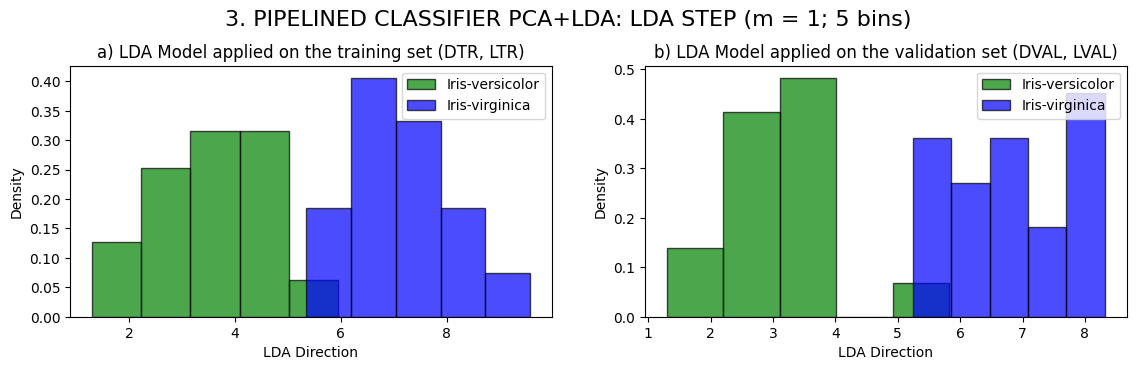

In [98]:
densityPlots_TR_VAL(DTR_lda_model3, LTR, DVAL_lda_model3, LVAL, title1="a) LDA Model applied on the training set (DTR, LTR)", bins1=5, title2="b) LDA Model applied on the validation set (DVAL, LVAL)", bins2=5, title=f"3. PIPELINED CLASSIFIER PCA+LDA: LDA STEP (m = 1; 5 bins)", xlabel = "LDA Direction")

**Comparison with the other two models:**

1. With Model1 using just LDA with m = 1 the situation was like this: <br> <br>
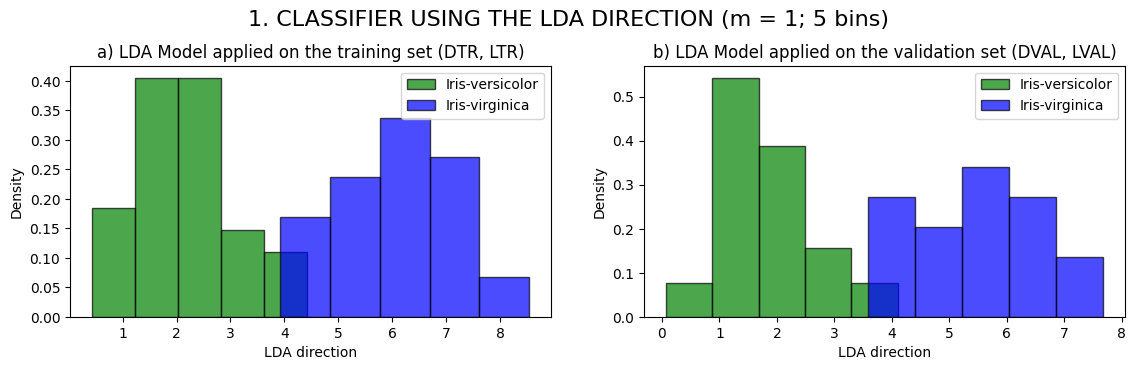 <br>
2. With Model2 using just PCA with m = 2 we obtained: <br> <br>
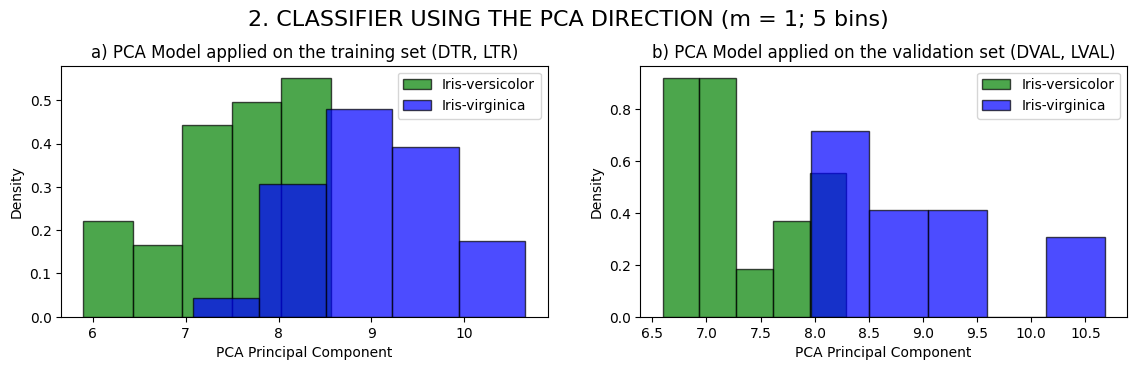

- I can say that the Model3 applied over the valiation set produces a result in which the 2 classes are farher from each other. <br>
- Also, if we look at how the Model3 performs if applied on the training set, the overlapping bin of Iris-versicolor has lower density compared to the results displayed by Model2 (using just LDA), so there are less samples of the Iris-versicolor overlapping with the Iris-virginica samples.

In [99]:

def singleAxis1DScatterPlot(x, y):

    labelColors = {1: "green", 2: "blue"}
    classLabels = {1: 'Iris-versicolor', 2: 'Iris-virginica'}


    for label in labelColors:
        xAxis = x[0, y == label]        #this are the real points (1-dimensional)
        yAxis = x[0, y == label]        #this is done to let the points stay on the 45 degrees axis to make them more visualizable 
        plt.scatter(xAxis, yAxis, color= labelColors[label], alpha=0.7,  label=f"{classLabels[label]}", edgecolor="black")

        #plt.label(featuresNames[i])
        #plt.ylabel(featuresNames[j])
        plt.legend()
        plt.title(f"Single Axis 1-D Scatter plot (45 degrees Axis chosen for better visualization), (DVAL, LVAL)")
        plt.xlabel("Projected Feature Value")
        plt.ylabel("Points on the 45 degrees axis (NOT real coordinates)")
    
    plt.show()

In [100]:

def jitter1DScatterPlot(x, y):
    #Adds jitter since the points are one dimensional so we have to distinguish them better
    labelColors = {1: "green", 2: "blue"}
    classLabels = {1: 'Iris-versicolor', 2: 'Iris-virginica'}
    
    #What does jitter do? It introduces a variation on the Y axis to better visualize the points
    #In fact, since the points are just 1-dimensional, they would stay just on the X axis
    #so jitter randomize their Y coordinates 
    np.random.seed(42)  
    jitter = np.random.normal(0, 0.05, size=x.shape[1])  
    
    for label in labelColors:
        xFeature = x[0, y == label]
        yJitter = jitter[y == label]  # Add a different randomized jitter for each class
        plt.scatter(xFeature, yJitter, color=labelColors[label], alpha=0.7, 
                    label=f"{classLabels[label]}", edgecolor="black")

    plt.xlabel("Projected Feature Value")
    plt.ylabel("Jitter (for visualization -- NOT real coordinates!)")
    plt.legend()
    plt.title("1D Scatter plot with jitter (DVAL, LVAL)")
    plt.show()

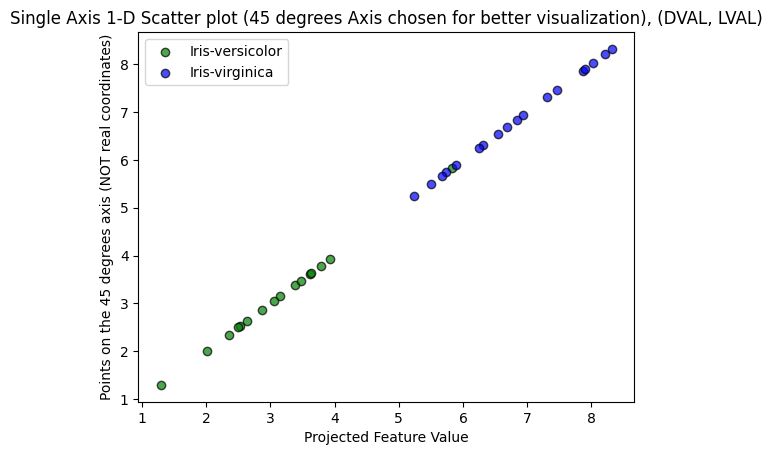

In [101]:
singleAxis1DScatterPlot(DVAL_lda_model3, LVAL)

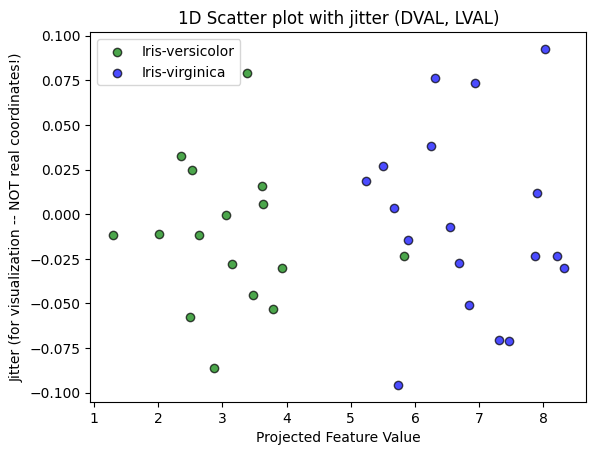

In [102]:
jitter1DScatterPlot(DVAL_lda_model3, LVAL)

#### Pipeline Step3: train the PCA+LDA classifier
We use the same metric for the threshold and apply the same classification rule as seen in the other two models:

In [103]:
#Since the projected samples have only one dimension, we can calculate the mean of the mean of the 2 classes simply like this (without a for loop):
threshold_model3 = (DTR_lda_model3[0, LTR==1].mean() + DTR_lda_model3[0, LTR==2].mean()) / 2.0

print(f"Selected threshold is: {threshold_model3}")

Selected threshold is: 5.354430233331156


In [104]:
#Build the model rule and apply it JUST on the VALIDATION SAMPLES

#Build an array to contain the predicted results, havinh shape equal to LVAL (34, )
#At the begoinning it's preallocated with all zero
#Later on it will store just 1 (class 1) or 2 (class 2)
PVAL_model3 = np.zeros(shape=LVAL.shape, dtype=np.int32)

#Classification rule:
#- elements located at the right of the threshold -> classified as **class 2** (*Iris-virginica*)
#- elements located at the left of the threshold -> classified as **class 1** (*Iris-versicolor*)

PVAL_model3[DVAL_lda_model3[0] >= threshold] = 2   #AT THE RIGHT OF THRESHOLD -> CLASS 2
PVAL_model3[DVAL_lda_model3[0] < threshold] = 1   #AT THE LEFT OF THRESHOLD -> CLASS 1

In [105]:
print(f"Predictions: {PVAL_model3}")
print(f"Actual classes: {LVAL}")

Predictions: [1 2 1 2 1 1 1 2 2 2 2 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]
Actual classes: [1 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1]


Error calculation for the PCA+LDA model:

In [106]:
#Confront the predictions to teh actual classes:

error_count = np.count_nonzero(PVAL_model3 != LVAL)
print(f"Number of wrong predictions: {error_count}")
error_rate = np.mean(PVAL_model3 != LVAL)
print(f"Error Rate: {error_rate:.2%}")

Number of wrong predictions: 1
Error Rate: 2.94%


That's the **lowest** error rate among the three models!

Accuracy, Precision, Recall, F-1 Score for the PCA+LDA model:

In [107]:
print(classification_report(LVAL, PVAL_model3, digits=3))

              precision    recall  f1-score   support

           1      1.000     0.938     0.968        16
           2      0.947     1.000     0.973        18

    accuracy                          0.971        34
   macro avg      0.974     0.969     0.970        34
weighted avg      0.972     0.971     0.971        34



Precision for class 1 is **100%** <br>
Recall for class 2 is **100%**